In [2]:
%matplotlib inline

import seaborn as sns
import pandas as pd
import sys
import glob
import matplotlib.patches as mpatches
import math


bandit_file = "/Users/tomerk11/Development/keystone-example/experiment-results/flickr-scaling-all/flickr-scaling-all.csv"
policy_labels = {'constant:0': 'Convolve via Loops', 'constant:1': 'Convolve via Matrix Multiply',
                 'constant:2': 'Convolve via FFT', 'oracle:min': 'Oracle'}

## Plot the current policy
bandit_rewards = pd.read_csv(bandit_file)
df = bandit_rewards

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from seaborn.palettes import _ColorPalette

def matplotlib_palette(name='viridis', n_colors=6,
                      light=.85, dark=.15, reverse=False, as_cmap=False):
    """Make a sequential palette from the cubehelix system.
    This produces a colormap with linearly-decreasing (or increasing)
    brightness. That means that information will be preserved if printed to
    black and white or viewed by someone who is colorblind.  "cubehelix" is
    also available as a matplotlib-based palette, but this function gives the
    user more control over the look of the palette and has a different set of
    defaults.
    Parameters
    ----------
    n_colors : int
        Number of colors in the palette.
    start : float, 0 <= start <= 3
        The hue at the start of the helix.
    rot : float
        Rotations around the hue wheel over the range of the palette.
    gamma : float 0 <= gamma
        Gamma factor to emphasize darker (gamma < 1) or lighter (gamma > 1)
        colors.
    hue : float, 0 <= hue <= 1
        Saturation of the colors.
    dark : float 0 <= dark <= 1
        Intensity of the darkest color in the palette.
    light : float 0 <= light <= 1
        Intensity of the lightest color in the palette.
    reverse : bool
        If True, the palette will go from dark to light.
    as_cmap : bool
        If True, return a matplotlib colormap instead of a list of colors.
    Returns
    -------
    palette or cmap : seaborn color palette or matplotlib colormap
        List-like object of colors as RGB tuples, or colormap object that
        can map continuous values to colors, depending on the value of the
        ``as_cmap`` parameter.
    See Also
    --------
    choose_cubehelix_palette : Launch an interactive widget to select cubehelix
                               palette parameters.
    dark_palette : Create a sequential palette with dark low values.
    light_palette : Create a sequential palette with bright low values.
    References
    ----------
    Green, D. A. (2011). "A colour scheme for the display of astronomical
    intensity images". Bulletin of the Astromical Society of India, Vol. 39,
    p. 289-295.
    Examples
    --------
    Generate the default palette:
    .. plot::
        :context: close-figs
        >>> import seaborn as sns; sns.set()
        >>> sns.palplot(sns.cubehelix_palette())
    Rotate backwards from the same starting location:
    .. plot::
        :context: close-figs
        >>> sns.palplot(sns.cubehelix_palette(rot=-.4))
    Use a different starting point and shorter rotation:
    .. plot::
        :context: close-figs
        >>> sns.palplot(sns.cubehelix_palette(start=2.8, rot=.1))
    Reverse the direction of the lightness ramp:
    .. plot::
        :context: close-figs
        >>> sns.palplot(sns.cubehelix_palette(reverse=True))
    Generate a colormap object:
    .. plot::
        :context: close-figs
        >>> from numpy import arange
        >>> x = arange(25).reshape(5, 5)
        >>> cmap = sns.cubehelix_palette(as_cmap=True)
        >>> ax = sns.heatmap(x, cmap=cmap)
    Use the full lightness range:
    .. plot::
        :context: close-figs
        >>> cmap = sns.cubehelix_palette(dark=0, light=1, as_cmap=True)
        >>> ax = sns.heatmap(x, cmap=cmap)
    """
    #cdict = mpl._cm.cubehelix(gamma, start, rot, hue)
    cmap = plt.get_cmap(name) #mpl.colors.LinearSegmentedColormap(name, cdict)

    x = np.linspace(light, dark, n_colors)
    pal = cmap(x)[:, :3].tolist()
    if reverse:
        pal = pal[::-1]

    if as_cmap:
        x_256 = np.linspace(light, dark, 256)
        if reverse:
            x_256 = x_256[::-1]
        pal_256 = cmap(x_256)
        cmap = mpl.colors.ListedColormap(pal_256)
        return cmap
    else:
        return _ColorPalette(pal)

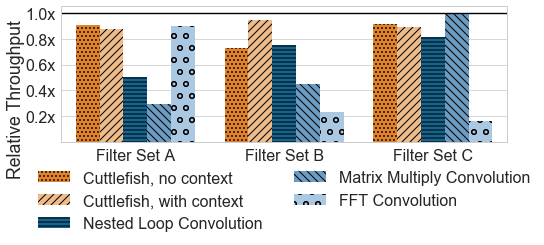

\begin{tabular}{lrrr}
\toprule
Filter Bank Properties &  Filter Set A &  Filter Set B &  Filter Set C \\
Convolution Algorithm       &               &               &               \\
\midrule
Cuttlefish, no context      &      0.903451 &      0.727339 &      0.915637 \\
Cuttlefish, with context    &      0.874657 &      0.943350 &      0.889043 \\
FFT Convolution             &      0.901381 &      0.231572 &      0.167402 \\
Matrix Multiply Convolution &      0.294796 &      0.453110 &      1.000000 \\
Nested Loop Convolution     &      0.504562 &      0.748314 &      0.813939 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
Filter Bank Properties &  Filter Set A &  Filter Set B &  Filter Set C \\
Convolution Algorithm       &               &               &               \\
\midrule
Cuttlefish, no context      &           149 &           124 &           287 \\
Cuttlefish, with context    &           154 &            95 &           295 \\
FFT Convolution             &     

In [9]:
# Flickr Convolution
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=2.0)

# Colors sourced from: http://jfly.iam.u-tokyo.ac.jp/color/
# and from: http://www.cookbook-r.com/Graphs/Colors_%28ggplot2%29/
# Black, orange, sky blue, bluish green, yellow, blue, vermilion
#colors = ['#000000', '#e69f00', '#56b4e9', '#009e73', '#f0e442', '#0072b2', '#d55e00'][::-1]

colors = ['#FF800E', '#FFBC79', '#006BA4', '#5F9ED1', '#A2C8EC']#['#f0e442', '#009e73', '#56b4e9', '#e69f00', '#999999', '#d55e00', '#000000', '#0072b2']

sns.set_palette(colors)#matplotlib_palette(n_colors=5, name='plasma', light=1.2, dark=0.0)) # This is a colorblind-safe palette (for 3 colors)



bandit_file = "/Users/tomerk11/Development/keystone-example/experiment-results/convolve-context/convolve-context-all.csv"
bandit_rewards = pd.read_csv(bandit_file)

df = bandit_rewards.copy()
df = df[df['globalTime'] > 0]
df = df[df['numParts'] == 8*4]
df = df[df['crops'] == '0,0,0.5,0.5']
df = df[df['crops'] == '0,0,0.5,0.5']
df["policy2"] = df["policy"] + ',' + df["disableMulticore"].map(str) + ',' + df["driftRate"].map(str)

workload_names = {'25,5': 'Filter Set A', '5,3:5,20:8,30:24,5:25,1':  'Filter Set B', '8,50': 'Filter Set C'}
df = df.replace({'patches': workload_names})

df =  df[['patches', 'policy2', 'globalTime']]#.pivot(index='query', columns='policy2', values='totalExecutorJoinTime')
df['oracle'] = df[['patches', 'globalTime']].groupby('patches').transform('min')
df['val'] = df['oracle'] / df['globalTime']
df = df[df['policy2'].isin(['constant:0,False,999981s', 'constant:1,False,999981s', 'constant:2,False,999981s','gaussian-thompson-sampling:1.0,False,15s', 'slinear-thompson-sampling:image_size,filter_size,fft_i,fft_f:true:0.25,False,999999999999999s'])]

names = {'constant:0,False,999981s': 'Nested Loop Convolution', 'constant:1,False,999981s': 'Matrix Multiply Convolution', 'constant:2,False,999981s': 'FFT Convolution','gaussian-thompson-sampling:1.0,False,15s': 'Cuttlefish, no context', 'slinear-thompson-sampling:image_size,filter_size,fft_i,fft_f:true:0.25,False,999999999999999s': 'Cuttlefish, with context'}
name_order = ['Cuttlefish, no context', 'Cuttlefish, with context', 'Nested Loop Convolution', 'Matrix Multiply Convolution', 'FFT Convolution']

df = df.replace({'policy2': names})

#plt.figure(figsize=(16, 3))
#sns.plt.ylim(0,14)
#ax = sns.barplot(data=df, x='regex', hue='policy2', y='val')

#plt.figure(figsize=(20, 1.0))
f, (ax) = plt.subplots(1, 1, sharex=True, figsize=(8, 2.5))

sns.barplot(data=df, x='patches', hue='policy2', hue_order=name_order, y='val', ax=ax)

# Set hatches
import itertools
hatches = itertools.cycle(['...', '///', '---', '\\\\\\', 'o', '///'])
num_queries = len(df['patches'].unique())
for i, bar in enumerate(ax.patches):
    if i % num_queries == 0:
        hatch = next(hatches)
    bar.set_hatch(hatch)

ax.set_xlabel('')
ax.set_yticks([0.2,0.4,0.6,0.8,1.0])
from matplotlib.ticker import FormatStrFormatter
ax.yaxis.set_major_formatter(FormatStrFormatter('%0.1fx'))

ax.set_ylabel('Relative Throughput')
ax.yaxis.set_label_coords(-0.08,0.32)

ax.hlines([1.0], -1000, 1000)

#leg = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
leg = ax.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)

#df.plot.bar()
#plt.show()
plt.savefig('flickr_8node.pdf', bbox_extra_artists=(leg,), bbox_inches='tight')
plt.show()

df['Convolution Algorithm'] = df['policy2']
df['Filter Bank Properties'] = df['patches']
df['Total Convolve Time (s)'] = (df['globalTime']/1e3).astype(int)
print df.pivot(index='Convolution Algorithm', columns='Filter Bank Properties', values='val').to_latex()
print df.pivot(index='Convolution Algorithm', columns='Filter Bank Properties', values='Total Convolve Time (s)').to_latex()



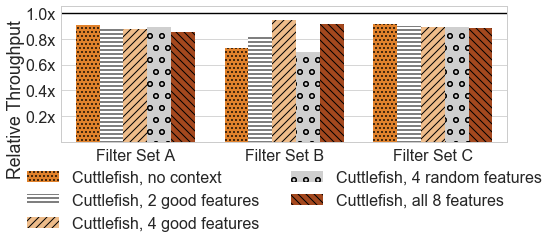

In [251]:
# Flickr Convolution Context
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=2.0)

# Colors sourced from: http://jfly.iam.u-tokyo.ac.jp/color/
# and from: http://www.cookbook-r.com/Graphs/Colors_%28ggplot2%29/
# Black, orange, sky blue, bluish green, yellow, blue, vermilion
#colors = ['#000000', '#e69f00', '#56b4e9', '#009e73', '#f0e442', '#0072b2', '#d55e00'][::-1]

#colors = ['#FF800E', '#006BA4', '#FFBC79', '#5F9ED1', '#A2C8EC']#['#f0e442', '#009e73', '#56b4e9', '#e69f00', '#999999', '#d55e00', '#000000', '#0072b2']
colors = ['#FF800E', '#FFFFFF', '#FFBC79', '#CFCFCF', '#BB4007'] #['#f0e442', '#009e73', '#56b4e9', '#e69f00', '#999999', '#d55e00', '#000000', '#0072b2']


sns.set_palette(colors)#matplotlib_palette(n_colors=5, name='plasma', light=1.2, dark=0.0)) # This is a colorblind-safe palette (for 3 colors)

bandit_file = "/Users/tomerk11/Development/keystone-example/experiment-results/convolve-context/convolve-context-all.csv"
bandit_rewards = pd.read_csv(bandit_file)

df = bandit_rewards.copy()
df = df[df['globalTime'] > 0]
df = df[df['numParts'] == 8*4]
df = df[df['crops'] == '0,0,0.5,0.5']

df["policy2"] = df["policy"] + ',' + df["disableMulticore"].map(str) + ',' + df["driftRate"].map(str)

workload_names = {'25,5': 'Filter Set A', '5,3:5,20:8,30:24,5:25,1':  'Filter Set B', '8,50': 'Filter Set C'}
df = df.replace({'patches': workload_names})

df =  df[['patches', 'policy2', 'globalTime']]#.pivot(index='query', columns='policy2', values='totalExecutorJoinTime')
df['oracle'] = df[['patches', 'globalTime']].groupby('patches').transform('min')
df['val'] = df['oracle'] / df['globalTime']
#df = df[df['policy2'].isin(['constant:0,False', 'constant:1,False', 'constant:2,False','gaussian-thompson-sampling:1.0,False', 'slinear-thompson-sampling:image_rows,image_cols,filter_rows,filter_cols,image_size:true:1.0,False'])]
policies_to_keep = [
#    'blinear-thompson-sampling:bias,image_size,filter_size,fft_i,fft_f,random_1,random_10,random_1000,random_100000:true:0.11111,False,15s',
#       'blinear-thompson-sampling:bias,image_size,filter_size,fft_i,fft_f:true:0.2,False,15s',
#       'blinear-thompson-sampling:bias,image_size,filter_size:true:0.333,False,15s',
       #'constant:0,False,999981s', 'constant:1,False,999981s',
       #'constant:2,False,999981s',
       'gaussian-thompson-sampling:1.0,False,15s',
       #'oracle:min:oracle_data.csv,False,999981s',
       #'slinear-thompson-sampling:bias,bias,bias,bias:true:0.25,False,999999999999999s',
       #'slinear-thompson-sampling:bias,image_size,filter_size,fft_i,fft_f:true:0.2,False,999999999999999s',
       #'slinear-thompson-sampling:bias:true:1.0,False,15s',
       'slinear-thompson-sampling:image_size,filter_size,fft_i,fft_f,random_1,random_10,random_1000,random_100000:true:0.125,False,999999999999999s',
#       'slinear-thompson-sampling:image_size,filter_size,fft_i,fft_f,random_1,random_10,random_1000,random_100000:true:0.125,False,15s',
       'slinear-thompson-sampling:image_size,filter_size,fft_i,fft_f:true:0.25,False,999999999999999s',
#       'slinear-thompson-sampling:image_size,filter_size,fft_i,fft_f:true:0.25,False,15s',
       'slinear-thompson-sampling:image_size,filter_size:true:0.5,False,999999999999999s',
#       'slinear-thompson-sampling:image_size,filter_size:true:0.5,False,15s',
#       'slinear-thompson-sampling:image_size:true:1.0,False,999999999999999s',
#       'slinear-thompson-sampling:image_size:true:1.0,False,15s',
       'slinear-thompson-sampling:random_1,random_10,random_1000,random_100000:true:0.25,False,999999999999999s']
df = df[df['policy2'].isin(policies_to_keep)]

names = {
    'gaussian-thompson-sampling:1.0,False,15s': 'Cuttlefish, no context',
    'slinear-thompson-sampling:image_size,filter_size,fft_i,fft_f,random_1,random_10,random_1000,random_100000:true:0.125,False,999999999999999s': 'Cuttlefish, all 8 features',
    'slinear-thompson-sampling:image_size,filter_size,fft_i,fft_f:true:0.25,False,999999999999999s': 'Cuttlefish, 4 good features',
    'slinear-thompson-sampling:image_size,filter_size:true:0.5,False,999999999999999s': 'Cuttlefish, 2 good features',
    'slinear-thompson-sampling:random_1,random_10,random_1000,random_100000:true:0.25,False,999999999999999s': 'Cuttlefish, 4 random features'
}
name_order = ['Cuttlefish, no context', 'Cuttlefish, 2 good features', 'Cuttlefish, 4 good features', 'Cuttlefish, 4 random features', 'Cuttlefish, all 8 features']

df = df.replace({'policy2': names})


#df = df.replace({'policy2': names})

#plt.figure(figsize=(20, 1.0))
f, (ax) = plt.subplots(1, 1, sharex=True, figsize=(8, 2.5))

#sns.barplot(data=df, x='patches', hue='policy2', hue_order=name_order, y='val', ax=ax)
sns.barplot(data=df, x='patches', hue='policy2', hue_order=name_order, y='val', ax=ax)


# Set hatches
import itertools
hatches = itertools.cycle(['...', '---', '///', 'o', '\\\\\\',])
num_queries = len(df['patches'].unique())
for i, bar in enumerate(ax.patches):
    if i % num_queries == 0:
        hatch = next(hatches)
    bar.set_hatch(hatch)

ax.set_xlabel('')
ax.set_yticks([0.2,0.4,0.6,0.8,1.0])
from matplotlib.ticker import FormatStrFormatter
ax.yaxis.set_major_formatter(FormatStrFormatter('%0.1fx'))

ax.set_ylabel('Relative Throughput')
ax.yaxis.set_label_coords(-0.08,0.32)

ax.hlines([1.0], -1000, 1000)

#leg = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
leg = ax.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)

#df.plot.bar()
#plt.show()
plt.savefig('flickr_8node_context.pdf', bbox_extra_artists=(leg,), bbox_inches='tight')
plt.show()

#display(df['policy2'].unique())


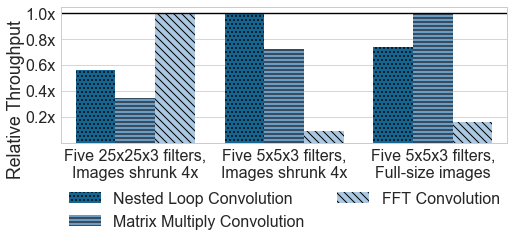

\begin{tabular}{lrrr}
\toprule
Filter Bank Properties &  Five 25x25x3 filters,\textbackslashnImages shrunk 4x &  Five 5x5x3 filters,\textbackslashnFull-size images &  Five 5x5x3 filters,\textbackslashnImages shrunk 4x \\
Convolution Algorithm       &                                          &                                        &                                        \\
\midrule
FFT Convolution             &                                 1.000000 &                               0.162005 &                               0.088772 \\
Matrix Multiply Convolution &                                 0.346456 &                               1.000000 &                               0.728908 \\
Nested Loop Convolution     &                                 0.561170 &                               0.744063 &                               1.000000 \\
\bottomrule
\end{tabular}



In [138]:
# This cell generates the Flickr convolution motivation plot

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=2.0)

# Colors sourced from: http://jfly.iam.u-tokyo.ac.jp/color/
# and from: http://www.cookbook-r.com/Graphs/Colors_%28ggplot2%29/
# Black, orange, sky blue, bluish green, yellow, blue, vermilion
#colors = ['#000000', '#e69f00', '#56b4e9', '#009e73', '#f0e442', '#0072b2', '#d55e00'][::-1]

colors = ['#006BA4', '#5F9ED1', '#A2C8EC', '#CFCFCF']#colors = ['#f0e442', '#009e73', '#56b4e9', '#e69f00', '#999999', '#d55e00', '#000000', '#0072b2']

sns.set_palette(colors)#matplotlib_palette(n_colors=5, name='plasma', light=1.2, dark=0.0)) # This is a colorblind-safe palette (for 3 colors)

df = pd.read_csv('/Users/tomerk11/Development/keystone-example/experiment-results/flickr-motivation/flickr-motivation-all.csv')

df = df[df['globalTime'] > 0]
df = df[df['numParts'] == 8*4]
df["policy2"] = df["policy"] + ',' + df["disableMulticore"].map(str)

df["workload"] = df["patches"] + ',' + df["crops"].map(str)

df = df[df['policy2'].isin(['constant:0,False', 'constant:1,False', 'constant:2,False'])]

df = df[df['workload'].isin(['25,5,0,0,0.5,0.5', '5,5,0,0,0.5,0.5', '5,5,0,0,1.0,1.0'])] #, '8,50,0,0,0.5,0.5', '15,15,0,0,1.0,1.0'])]
workload_names = {'25,5,0,0,0.5,0.5': 'Five 25x25x3 filters,\nImages shrunk 4x', '5,5,0,0,0.5,0.5': 'Five 5x5x3 filters,\nImages shrunk 4x', '5,5,0,0,1.0,1.0': 'Five 5x5x3 filters,\nFull-size images'}
workload_name_order = ['Nested Loop Convolution', 'Matrix Multiply Convolution', 'FFT Convolution']

df = df.replace({'workload': workload_names})

df =  df[['workload', 'policy2', 'globalTime']]#.pivot(index='query', columns='policy2', values='totalExecutorJoinTime')
df['oracle'] = df[['workload', 'globalTime']].groupby('workload').transform('min')
df['val'] = df['oracle'] / df['globalTime']

names = {'constant:0,False': 'Nested Loop Convolution', 'constant:1,False': 'Matrix Multiply Convolution', 'constant:2,False': 'FFT Convolution','gaussian-thompson-sampling:1.0,False': 'Cuttlefish, no context', 'slinear-thompson-sampling:image_rows,image_cols,filter_rows,filter_cols,image_size:true:1.0,False': 'Cuttlefish, with context'}
name_order = ['Nested Loop Convolution', 'Matrix Multiply Convolution', 'FFT Convolution']

df = df.replace({'policy2': names})
#plt.figure(figsize=(16, 3))
#sns.plt.ylim(0,14)
#ax = sns.barplot(data=df, x='regex', hue='policy2', y='val')

#plt.figure(figsize=(20, 1.0))
f, (ax) = plt.subplots(1, 1, sharex=True, figsize=(8, 2.5))

sns.barplot(data=df, x='workload', hue='policy2', hue_order=name_order, y='val', ax=ax)

# Set hatches
import itertools
hatches = itertools.cycle(['...', '---', '\\\\\\', 'o', '///'])
num_queries = len(df['workload'].unique())
for i, bar in enumerate(ax.patches):
    if i % num_queries == 0:
        hatch = next(hatches)
    bar.set_hatch(hatch)


ax.hlines([1.0], -1000, 1000)
ax.set_ylim(0,1.05)

#leg = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
leg = ax.legend(loc=9, bbox_to_anchor=(0.5, -0.25), ncol=2)


for p in ax.patches:
    ymin, ymax = ax.get_ylim()
    height = p.get_height()
    if height > ymax:
        ax.hlines([ymax], p.get_x()-p.get_width()/4., p.get_x()+p.get_width()*1.25, linewidth=5)
        ax.text(p.get_x()+p.get_width()/2.,
                min(height, ymax) + 0.05,
                '{:1.2f}x'.format(height),
                ha="center") 

ax.set_xlabel('')
ax.set_yticks([0.2,0.4,0.6,0.8,1.0])
from matplotlib.ticker import FormatStrFormatter
ax.yaxis.set_major_formatter(FormatStrFormatter('%0.1fx'))

ax.set_ylabel('Relative Throughput')
ax.yaxis.set_label_coords(-0.08,0.32)

#df.plot.bar()
#plt.show()
plt.savefig('flickr_8node_motivation.pdf', bbox_extra_artists=(leg,), bbox_inches='tight')
plt.show()

df['Convolution Algorithm'] = df['policy2']
df['Filter Bank Properties'] = df['workload']
df['Total Convolve Time (s)'] = (df['globalTime']/1e3).astype(int)
print df.pivot(index='Convolution Algorithm', columns='Filter Bank Properties', values='val').to_latex()




['Dynamic', 'Use All', 'Use All Local', 'Use All Recent', 'Use Recent Local']


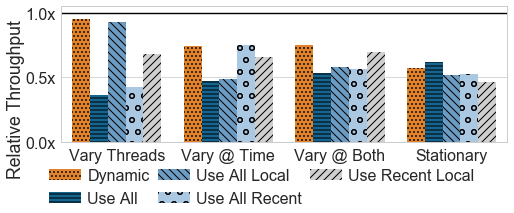

In [127]:
# Nonstationary no context

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=2.0)

# Colors sourced from: http://jfly.iam.u-tokyo.ac.jp/color/
# and from: http://www.cookbook-r.com/Graphs/Colors_%28ggplot2%29/
# Black, orange, sky blue, bluish green, yellow, blue, vermilion
#colors = ['#000000', '#e69f00', '#56b4e9', '#009e73', '#f0e442', '#0072b2', '#d55e00'][::-1]

colors = ['#FF800E', '#006BA4', '#5F9ED1', '#A2C8EC', '#CFCFCF'] #['#f0e442', '#009e73', '#56b4e9', '#e69f00', '#999999', '#d55e00', '#000000', '#0072b2']

sns.set_palette(colors)#matplotlib_palette(n_colors=5, name='plasma', light=1.2, dark=0.0)) # This is a colorblind-safe palette (for 3 colors)



bandit_file = "/Users/tomerk11/Development/keystone-example/experiment-results/flickr-nonstationary-context/flickr-context-nonstationary-all.csv"
## Plot the current policy
bandit_rewards = pd.read_csv(bandit_file)
df = bandit_rewards

df = df[df['globalTime'] > 0]
df = df[df['numParts'] == 8*4]
df["policy2"] = df["policy"] + ',' + df["tag"].map(str) + ',' + df["clusterCoefficient"].map(str)

nonstationarity_names = {'partitions_vary': 'Vary Threads', 'global_drift,0.01': 'Vary @ Time', 'local_drift,0.01,': 'Vary @ Both', 'local_drift,0.01': 'Vary @ Both', 'stationary': 'Stationary'}
df = df.replace({'nonstationarity': nonstationarity_names})


df =  df[['nonstationarity', 'policy', 'policy2', 'tag', 'clusterCoefficient', 'globalTime']]#.pivot(index='query', columns='policy2', values='totalExecutorJoinTime')
df['oracle'] = df[['nonstationarity', 'globalTime']].groupby('nonstationarity').transform('min')
df['val'] = df['oracle'] / df['globalTime']
#df = df[df['policy2'].isin(['constant:0,False', 'constant:1,False', 'constant:2,False','gaussian-thompson-sampling:1.0,False', 'slinear-thompson-sampling:image_rows,image_cols,filter_rows,filter_cols,image_size:true:1.0,False'])]

df = df[df['clusterCoefficient'] != 0.25]
df = df[df['clusterCoefficient'] != 0.5]
df = df[df['clusterCoefficient'] != 1.0]
df = df[df['clusterCoefficient'] != 2.0]
df = df[df['clusterCoefficient'] != 3.0]
df = df[df['policy'] == 'gaussian-thompson-sampling:1.0']

#df = df.replace({'policy2': names})
#plt.figure(figsize=(16, 3))
#sns.plt.ylim(0,14)
#ax = sns.barplot(data=df, x='regex', hue='policy2', y='val')

#plt.figure(figsize=(20, 1.0))
f, (ax) = plt.subplots(1, 1, sharex=True, figsize=(8, 2.5))

names = {'shareSmartNoContext': 'Dynamic','shareAll': 'Use All', 'shareNone': 'Use Recent Local', 'shareOldOnly': 'Use All Local', 'shareNonlocalOnly': 'Use All Recent'}
name_order = ['Dynamic', 'Use All', 'Use All Local', 'Use All Recent', 'Use Recent Local']
df = df.replace({'tag': names})

print name_order
sns.barplot(data=df, x='nonstationarity', hue='tag', y='val', ax=ax, hue_order=name_order)

# Set hatches
import itertools
hatches = itertools.cycle(['...', '---', '\\\\\\', 'o', '///'])
num_queries = len(df['nonstationarity'].unique())
for i, bar in enumerate(ax.patches):
    if i % num_queries == 0:
        hatch = next(hatches)
    bar.set_hatch(hatch)


ax.set_ylabel('Relative Throughput')
ax.set_xlabel('')
ax.hlines([1.0], -1000, 1000)
ax.yaxis.set_label_coords(-0.08,0.32)
from matplotlib.ticker import FormatStrFormatter
ax.yaxis.set_major_formatter(FormatStrFormatter('%0.1fx'))

#leg = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
leg = ax.legend(loc=9, bbox_to_anchor=(0.45, -0.13), ncol=3, handletextpad=0.4, borderpad=0, columnspacing=0.5)

#df.plot.bar()
#plt.show()
plt.savefig('flickr_8node_nonstationary.pdf', bbox_extra_artists=(leg,), bbox_inches='tight')
plt.show()


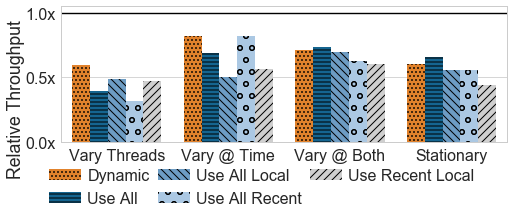

In [128]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=2.0)

# Colors sourced from: http://jfly.iam.u-tokyo.ac.jp/color/
# and from: http://www.cookbook-r.com/Graphs/Colors_%28ggplot2%29/
# Black, orange, sky blue, bluish green, yellow, blue, vermilion
#colors = ['#000000', '#e69f00', '#56b4e9', '#009e73', '#f0e442', '#0072b2', '#d55e00'][::-1]

colors = ['#FF800E', '#006BA4', '#5F9ED1', '#A2C8EC', '#CFCFCF']#colors = ['#f0e442', '#009e73', '#56b4e9', '#e69f00', '#999999', '#d55e00', '#000000', '#0072b2']

sns.set_palette(colors)#matplotlib_palette(n_colors=5, name='plasma', light=1.2, dark=0.0)) # This is a colorblind-safe palette (for 3 colors)



bandit_file = "/Users/tomerk11/Development/keystone-example/experiment-results/flickr-nonstationary-context/flickr-context-nonstationary-all.csv"
## Plot the current policy
bandit_rewards = pd.read_csv(bandit_file)
df = bandit_rewards

df = df[df['globalTime'] > 0]
df = df[df['numParts'] == 8*4]
df["policy2"] = df["policy"] + ',' + df["tag"].map(str) + ',' + df["clusterCoefficient"].map(str)

nonstationarity_names = {'partitions_vary': 'Vary Threads', 'global_drift,0.01': 'Vary @ Time', 'local_drift,0.01,': 'Vary @ Both', 'local_drift,0.01': 'Vary @ Both', 'stationary': 'Stationary'}
df = df.replace({'nonstationarity': nonstationarity_names})


df =  df[['nonstationarity', 'policy', 'policy2', 'tag', 'clusterCoefficient', 'globalTime']]#.pivot(index='query', columns='policy2', values='totalExecutorJoinTime')
df['oracle'] = df[['nonstationarity', 'globalTime']].groupby('nonstationarity').transform('min')
df['val'] = df['oracle'] / df['globalTime']
#df = df[df['policy2'].isin(['constant:0,False', 'constant:1,False', 'constant:2,False','gaussian-thompson-sampling:1.0,False', 'slinear-thompson-sampling:image_rows,image_cols,filter_rows,filter_cols,image_size:true:1.0,False'])]

df = df[df['clusterCoefficient'] != 0.25]
df = df[df['clusterCoefficient'] != 0.5]
df = df[df['clusterCoefficient'] != 1.0]
df = df[df['clusterCoefficient'] != 3.0]
#df = df[(df['policy'] == 'slinear-thompson-sampling:image_rows,image_cols,filter_rows,filter_cols,image_size:true:1.0') | (df['policy'] == 'slinear-thompson-sampling:bias,image_rows,image_cols,filter_rows,filter_cols,image_size:true:1.0')]
df = df[df['policy'] == 'slinear-thompson-sampling:image_rows,image_cols,filter_rows,image_size:true:1.0']

df = df[df["tag"] != "shareSmart"]
#df["tag"] = df["tag"].map(str) + ',' + df["policy"].map(str) + ',' + df["clusterCoefficient"].map(str)


#df = df.replace({'policy2': names})
#plt.figure(figsize=(16, 3))
#sns.plt.ylim(0,14)
#ax = sns.barplot(data=df, x='regex', hue='policy2', y='val')

#plt.figure(figsize=(20, 1.0))
f, (ax) = plt.subplots(1, 1, sharex=True, figsize=(8, 2.5))

names = {'shareSmartContext': 'Dynamic','shareAll': 'Use All', 'shareNone': 'Use Recent Local', 'shareOldOnly': 'Use All Local', 'shareNonlocalOnly': 'Use All Recent'}
name_order = ['Dynamic', 'Use All', 'Use All Local', 'Use All Recent', 'Use Recent Local']
df = df.replace({'tag': names})

sns.barplot(data=df, x='nonstationarity', hue='tag', y='val', ax=ax, hue_order=name_order)

# Set hatches
import itertools
hatches = itertools.cycle(['...', '---', '\\\\\\', 'o', '///'])
num_queries = len(df['nonstationarity'].unique())
for i, bar in enumerate(ax.patches):
    if i % num_queries == 0:
        hatch = next(hatches)
    bar.set_hatch(hatch)


ax.set_ylabel('Relative Throughput')
ax.set_xlabel('')
ax.hlines([1.0], -1000, 1000)
ax.yaxis.set_label_coords(-0.08,0.32)
from matplotlib.ticker import FormatStrFormatter
ax.yaxis.set_major_formatter(FormatStrFormatter('%0.1fx'))

#leg = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
leg = ax.legend(loc=9, bbox_to_anchor=(0.45, -0.13), ncol=3, handletextpad=0.4, borderpad=0, columnspacing=0.5)

#df.plot.bar()
#plt.show()
plt.savefig('flickr_8node_nonstationary_somecontext.pdf', bbox_extra_artists=(leg,), bbox_inches='tight')
plt.show()



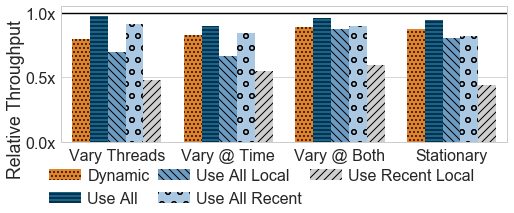

In [129]:
# Nonstationary all context
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=2.0)

# Colors sourced from: http://jfly.iam.u-tokyo.ac.jp/color/
# and from: http://www.cookbook-r.com/Graphs/Colors_%28ggplot2%29/
# Black, orange, sky blue, bluish green, yellow, blue, vermilion
#colors = ['#000000', '#e69f00', '#56b4e9', '#009e73', '#f0e442', '#0072b2', '#d55e00'][::-1]

colors = ['#FF800E', '#006BA4', '#5F9ED1', '#A2C8EC', '#CFCFCF']#colors = ['#f0e442', '#009e73', '#56b4e9', '#e69f00', '#999999', '#d55e00', '#000000', '#0072b2']

sns.set_palette(colors)#matplotlib_palette(n_colors=5, name='plasma', light=1.2, dark=0.0)) # This is a colorblind-safe palette (for 3 colors)



bandit_file = "/Users/tomerk11/Development/keystone-example/experiment-results/flickr-nonstationary-context/flickr-context-nonstationary-all.csv"
## Plot the current policy
bandit_rewards = pd.read_csv(bandit_file)
df = bandit_rewards

df = df[df['globalTime'] > 0]
df = df[df['numParts'] == 8*4]
df["policy2"] = df["policy"] + ',' + df["tag"].map(str) + ',' + df["clusterCoefficient"].map(str)

nonstationarity_names = {'partitions_vary': 'Vary Threads', 'global_drift,0.01': 'Vary @ Time', 'local_drift,0.01,': 'Vary @ Both', 'local_drift,0.01': 'Vary @ Both', 'stationary': 'Stationary'}
df = df.replace({'nonstationarity': nonstationarity_names})


df =  df[['nonstationarity', 'policy', 'policy2', 'tag', 'clusterCoefficient', 'globalTime']]#.pivot(index='query', columns='policy2', values='totalExecutorJoinTime')
df['oracle'] = df[['nonstationarity', 'globalTime']].groupby('nonstationarity').transform('min')
df['val'] = df['oracle'] / df['globalTime']
#df = df[df['policy2'].isin(['constant:0,False', 'constant:1,False', 'constant:2,False','gaussian-thompson-sampling:1.0,False', 'slinear-thompson-sampling:image_rows,image_cols,filter_rows,filter_cols,image_size:true:1.0,False'])]

df = df[df['clusterCoefficient'] != 0.25]
df = df[df['clusterCoefficient'] != 0.5]
df = df[df['clusterCoefficient'] != 1.0]
df = df[df['clusterCoefficient'] != 3.0]
#df = df[(df['policy'] == 'slinear-thompson-sampling:image_rows,image_cols,filter_rows,filter_cols,image_size:true:1.0') | (df['policy'] == 'slinear-thompson-sampling:bias,image_rows,image_cols,filter_rows,filter_cols,image_size:true:1.0')]
df = df[df['policy'] == 'slinear-thompson-sampling:image_rows,image_cols,filter_rows,filter_cols,image_size:true:1.0']

df = df[df["tag"] != "shareSmart"]
#df["tag"] = df["tag"].map(str) + ',' + df["policy"].map(str) + ',' + df["clusterCoefficient"].map(str)


#df = df.replace({'policy2': names})
#plt.figure(figsize=(16, 3))
#sns.plt.ylim(0,14)
#ax = sns.barplot(data=df, x='regex', hue='policy2', y='val')

#plt.figure(figsize=(20, 1.0))
f, (ax) = plt.subplots(1, 1, sharex=True, figsize=(8, 2.5))

names = {'shareSmartContext': 'Dynamic','shareAll': 'Use All', 'shareNone': 'Use Recent Local', 'shareOldOnly': 'Use All Local', 'shareNonlocalOnly': 'Use All Recent'}
name_order = ['Dynamic', 'Use All', 'Use All Local', 'Use All Recent', 'Use Recent Local']
df = df.replace({'tag': names})

sns.barplot(data=df, x='nonstationarity', hue='tag', y='val', ax=ax, hue_order=name_order)

# Set hatches
import itertools
hatches = itertools.cycle(['...', '---', '\\\\\\', 'o', '///'])
num_queries = len(df['nonstationarity'].unique())
for i, bar in enumerate(ax.patches):
    if i % num_queries == 0:
        hatch = next(hatches)
    bar.set_hatch(hatch)

ax.set_ylabel('Relative Throughput')
ax.set_xlabel('')
ax.hlines([1.0], -1000, 1000)
ax.yaxis.set_label_coords(-0.08,0.32)
from matplotlib.ticker import FormatStrFormatter
ax.yaxis.set_major_formatter(FormatStrFormatter('%0.1fx'))

#leg = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
leg = ax.legend(loc=9, bbox_to_anchor=(0.45, -0.13), ncol=3, handletextpad=0.4, borderpad=0, columnspacing=0.5)

#df.plot.bar()
#plt.show()
plt.savefig('flickr_8node_nonstationary_allcontext.pdf', bbox_extra_artists=(leg,), bbox_inches='tight')
plt.show()




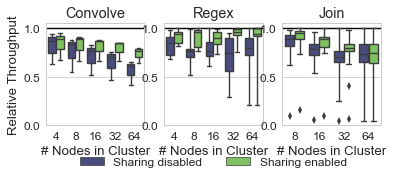

In [245]:
# Distributed sharing vs not comparison plot

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats.mstats import gmean
from scipy.stats import hmean

from numpy import mean

name_order = ['Sharing disabled', 'Sharing enabled']

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)

sns.set_palette(matplotlib_palette(n_colors=2, name='viridis', light=0.2, dark=0.8)) # This is a colorblind-safe palette (for 3 colors)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, figsize=(6, 1.875))


###
### Flickr
###

bandit_file = "/Users/tomerk11/Development/keystone-example/experiment-results/flickr-scaling-all/flickr-scaling-all.csv"

## Plot the current policy
bandit_rewards = pd.read_csv(bandit_file)

import numpy as np
df = bandit_rewards.copy()
df = df[df['partition_id'] >= 0]
df = df[df['numParts'] > 8]
df['time_in_sec'] = (df['system_nano_end_time'] - df['system_nano_start_time']) / 1e9
df = df[['numParts', 'policy', 'disableMulticore', 'patches', 'time_in_sec']]
df = df.groupby(['numParts', 'policy', 'disableMulticore', 'patches'], as_index=False).agg(np.sum)
df["policy2"] = df["policy"] + ',' + df["disableMulticore"].map(str)

#df = df[df['policy'] == 'constant:0']
df['numNodes'] = df['numParts'] / 4
#df =  df[['patches', 'policy2', 'numNodes', 'time_in_sec']]#.pivot(index='query', columns='policy2', values='totalExecutorJoinTime')
#df['oracle_min'] = df[['patches',  'numNodes', 'time_in_sec']].groupby(['patches',  'numNodes']).transform('min')

#df['val'] = (df['time_in_sec']) / df['oracle_min']


df =  df[['patches', 'policy2', 'numNodes', 'time_in_sec']]#.pivot(index='query', columns='policy2', values='totalExecutorJoinTime')
df['patches'] = df['patches'].astype(str)


#df_grouped = df[df['numNodes'] == 4][['regex', 'globalTime']].groupby(['regex']).agg('max')
df_grouped = df[df['numNodes'] == 4][['patches', 'time_in_sec']].groupby(['patches'], as_index=False).agg('min')
df_grouped['oracle_min'] = df_grouped['time_in_sec']
df_grouped['patches'] = df_grouped['patches'].astype(str)
df_joined = pd.merge(df, df_grouped[['patches', 'oracle_min']], on=['patches'])
df_joined['val'] = df_joined['oracle_min'] / (df_joined['time_in_sec'])


#df2 = df.copy()
#df2['totalExecutorJoinTime'] = df2['totalExecutorJoinTime']/1e3


#df2["policy2"] = df2["policy"] + ',' + df2["disableMulticore"].map(str) + ',' + df2["query"].map(str)
#df = df[df['py2'] != 'hash,True,False']
#df = df[df['py2'] != 'sort,True,False']

#df = df[df['regex'] != 3]
df_joined = df_joined[df_joined['policy2'].isin(['gaussian-thompson-sampling:1.0,False', 'gaussian-thompson-sampling:1.0,True'])]



#sns.plt.figure(figsize=(8, 3))
#sns.pointplot(data = df, x='numNodes', y='val', hue='py2')
#ax = sns.tsplot(data = df, unit='query', time='numNodes', condition='py2', value='val', err_style='ci_band', ci=[67, 100])
names = {'gaussian-thompson-sampling:1.0,False': 'Sharing enabled', 'gaussian-thompson-sampling:1.0,True': 'Sharing disabled'} 
df_joined = df_joined.replace({'policy2': names})
df_joined['numNodes'] = df_joined['numNodes'].astype(int)
df = df_joined

#sns.pointplot(data = df, x='numNodes', hue='policy2', y='val', capsize=0.3, ci=100, ax=ax1, n_boot=200000)
#sns.violinplot(data = df, x='numNodes', hue='policy2', y='val', ax=ax1, hue_order=name_order, split=True, cut=0, scale='area')
sns.boxplot(data = df, x='numNodes', hue='policy2', y='val', ax=ax1, hue_order=name_order, whis=999)#, estimator=hmean, capsize=.2)


#display(df)
#display(df_grouped)
#display(df_joined)

###
### Common Crawl REGEx
###
bandit_file = "/Users/tomerk11/Development/keystone-example/experiment-results/commoncrawl-scaling/commoncrawl-scaling-all.csv"

## Plot the current policy
bandit_rewards = pd.read_csv(bandit_file)
df = bandit_rewards
df = df[df['globalTime'] > 0]
df = df[df['regex'] != 4]

#df = df[df['policy'] == 'constant:0']

df['globalTime'] = df['globalTime']/1e3
df["policy2"] = df["policy"] + ',' + df["disableMulticore"].map(str)
#df2 = df2[df2['policy'] == 'gaussian-thompson-sampling:1.0']

#df = df[df['policy'] == 'constant:0']
df['numNodes'] = df['numParts'] / 16
df =  df[['regex', 'policy2', 'numNodes', 'globalTime']]#.pivot(index='query', columns='policy2', values='totalExecutorJoinTime')
df['oracle_min'] = df[['regex',  'numNodes', 'globalTime']].groupby(['regex',  'numNodes']).transform('min')

df['val'] =  df['oracle_min'] / (df['globalTime'])

'''
df =  df[['regex', 'policy2', 'numNodes', 'globalTime']]#.pivot(index='query', columns='policy2', values='totalExecutorJoinTime')
#df_grouped = df[df['numNodes'] == 4][['regex', 'globalTime']].groupby(['regex']).agg('max')
df_grouped = df[df['numNodes'] == 4][['regex', 'globalTime']].groupby(['regex'], as_index=False).agg('min')
df_grouped['oracle_min'] = df_grouped['globalTime']
df = df.join(df_grouped[['regex', 'oracle_min']], on=['regex'], how='inner', rsuffix='_r')
#df['oracle_min'] = df['oracle_min'] * 4 / df['numNodes']

df['val'] = (df['globalTime']) / df['oracle_min']'''

#df2 = df.copy()
#df2['totalExecutorJoinTime'] = df2['totalExecutorJoinTime']/1e3


#df2["policy2"] = df2["policy"] + ',' + df2["disableMulticore"].map(str) + ',' + df2["query"].map(str)
#df = df[df['py2'] != 'hash,True,False']
#df = df[df['py2'] != 'sort,True,False']

#df = df[df['regex'] != 3]
df = df[df['policy2'].str.startswith('gaussian')]


#sns.plt.figure(figsize=(4, 3))
#sns.pointplot(data = df, x='numNodes', y='val', hue='py2')
#ax = sns.tsplot(data = df, unit='query', time='numNodes', condition='py2', value='val', err_style='ci_band', ci=[67, 100])
names = {'gaussian-thompson-sampling:1.0,False': 'Sharing enabled', 'gaussian-thompson-sampling:1.0,True': 'Sharing disabled'}
df = df.replace({'policy2': names})

df['numNodes'] = df['numNodes'].astype(int)

#sns.pointplot(data = df, x='numNodes', hue='policy2', y='val', capsize=0.3, ci=100, ax=ax2, n_boot=2000)
#sns.violinplot(data = df, x='numNodes', hue='policy2', y='val', ax=ax2, hue_order=name_order, split=True, cut=0, scale='area')
sns.boxplot(data = df, x='numNodes', hue='policy2', y='val', ax=ax2, hue_order=name_order, whis=999)#, estimator=hmean, capsize=.2)



#sns.plt.ylim(0,)
#ax.set_xscale('log', basex=2)

###
### TPC-DS
###

bandit_file = "/Users/tomerk11/Development/keystone-example/experiment-results/tpcds-scaling/tpcds-scaling-all.csv"

## Plot the current policy
bandit_rewards = pd.read_csv(bandit_file)
df = bandit_rewards
df = df.sort_values('numNodes')
df = df[df['numNodes'] > 4]
df = df[df['index'] > 0]


#df = df[df['policy'] == 'constant:0']
df["py2"] = df["spark.sql.join.bandit.shuffleSortHash"] + ',' + df["spark.sql.join.banditJoin"].map(str) + ',' + df["disableMulticore"].map(str)
df =  df[['query', 'py2', 'numNodes', 'totalExecutorJoinTime']]#.pivot(index='query', columns='policy2', values='totalExecutorJoinTime')
df = df[df['py2'] != 'both,False,False']
df['oracle_max'] = df[['query',  'numNodes', 'totalExecutorJoinTime']].groupby(['query',  'numNodes']).transform('max')
df['oracle_min'] = df[['query',  'numNodes', 'totalExecutorJoinTime']].groupby(['query',  'numNodes']).transform('min')

df['val'] =  df['oracle_min'] / (df['totalExecutorJoinTime'])


#df2 = df.copy()
#df2['totalExecutorJoinTime'] = df2['totalExecutorJoinTime']/1e3


#df2["policy2"] = df2["policy"] + ',' + df2["disableMulticore"].map(str) + ',' + df2["query"].map(str)
df = df[df['py2'] != 'hash,True,False']
df = df[df['py2'] != 'sort,True,False']
names = {'both,True,False': 'Sharing enabled', 'both,True,True': 'Sharing disabled'}
df = df.replace({'py2': names})


#df = df[df['query'] != 'q72']

#sns.plt.figure(figsize=(8, 3))
#sns.pointplot(data = df, x='numNodes', y='val', hue='py2')
#ax = sns.tsplot(data = df, unit='query', time='numNodes', condition='py2', value='val', err_style='ci_band', ci=[67, 100])

sns.boxplot(data = df, x='numNodes', hue='py2', y='val', ax=ax3, hue_order=name_order, whis=3.5)#, estimator=hmean, capsize=.2)

# Remove undesired legends
ax1.legend_.remove()
ax3.legend_.remove()
leg = ax2.legend(loc=9, bbox_to_anchor=(0.5, -0.2), ncol=2)

#ax1.set_title('Flickr')
#ax2.set_title('Common Crawl')
#ax3.set_title('TPC-DS')

ax1.set_title('Convolve')
ax2.set_title('Regex')
ax3.set_title('Join')

#from matplotlib.ticker import FormatStrFormatter
#ax1.yaxis.set_major_formatter(FormatStrFormatter('%0.1fx'))
#ax2.yaxis.set_major_formatter(FormatStrFormatter('%0.1fx'))
#ax3.yaxis.set_major_formatter(FormatStrFormatter('%0.1fx'))

ax1.hlines([1.0], -1000, 1000)
ax2.hlines([1.0], -1000, 1000)
ax3.hlines([1.0], -1000, 1000)

ax1.set_ylim(0,1.05)
ax2.set_ylim(0,1.05)
ax3.set_ylim(0,1.05)

ax1.set_ylabel('Relative Throughput')
ax2.set_ylabel('')
ax3.set_ylabel('')

ax1.set_xlabel('# Nodes in Cluster')
ax2.set_xlabel('# Nodes in Cluster')
ax3.set_xlabel('# Nodes in Cluster')

plt.savefig('scaling-all.pdf', bbox_extra_artists=(leg,), bbox_inches='tight')
plt.show()


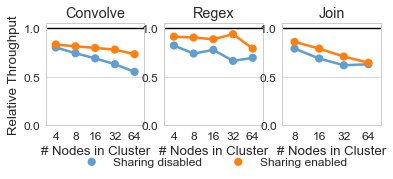

In [4]:
# Distributed sharing vs not comparison plot

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats.mstats import gmean
from scipy.stats import hmean

from numpy import mean

name_order = ['Sharing disabled', 'Sharing enabled']

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)

colors = ['#5F9ED1', '#FF800E', '#A2C8EC']#['#f0e442', '#009e73', '#56b4e9', '#e69f00', '#999999', '#d55e00', '#000000', '#0072b2']
#'#FFBC79', '#006BA4'
sns.set_palette(colors)#matplotlib_palette(n_colors=5, name='plasma', light=1.2, dark=0.0)) # This is a colorblind-safe palette (for 3 colors)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, figsize=(6, 1.875))


###
### Flickr
###

bandit_file = "/Users/tomerk11/Development/keystone-example/experiment-results/flickr-scaling-all/flickr-scaling-all.csv"

## Plot the current policy
bandit_rewards = pd.read_csv(bandit_file)

import numpy as np
df = bandit_rewards.copy()
df = df[df['partition_id'] >= 0]
df = df[df['numParts'] > 8]
df['time_in_sec'] = (df['system_nano_end_time'] - df['system_nano_start_time']) / 1e9
df = df[['numParts', 'policy', 'disableMulticore', 'patches', 'time_in_sec']]
df = df.groupby(['numParts', 'policy', 'disableMulticore', 'patches'], as_index=False).agg(np.sum)
df["policy2"] = df["policy"] + ',' + df["disableMulticore"].map(str)

#df = df[df['policy'] == 'constant:0']
df['numNodes'] = df['numParts'] / 4
#df =  df[['patches', 'policy2', 'numNodes', 'time_in_sec']]#.pivot(index='query', columns='policy2', values='totalExecutorJoinTime')
#df['oracle_min'] = df[['patches',  'numNodes', 'time_in_sec']].groupby(['patches',  'numNodes']).transform('min')

#df['val'] = (df['time_in_sec']) / df['oracle_min']


df =  df[['patches', 'policy2', 'numNodes', 'time_in_sec']]#.pivot(index='query', columns='policy2', values='totalExecutorJoinTime')
df['patches'] = df['patches'].astype(str)


#df_grouped = df[df['numNodes'] == 4][['regex', 'globalTime']].groupby(['regex']).agg('max')
df_grouped = df[df['numNodes'] == 4][['patches', 'time_in_sec']].groupby(['patches'], as_index=False).agg('min')
df_grouped['oracle_min'] = df_grouped['time_in_sec']
df_grouped['patches'] = df_grouped['patches'].astype(str)
df_joined = pd.merge(df, df_grouped[['patches', 'oracle_min']], on=['patches'])
df_joined['val'] = df_joined['oracle_min'] / (df_joined['time_in_sec'])


#df2 = df.copy()
#df2['totalExecutorJoinTime'] = df2['totalExecutorJoinTime']/1e3


#df2["policy2"] = df2["policy"] + ',' + df2["disableMulticore"].map(str) + ',' + df2["query"].map(str)
#df = df[df['py2'] != 'hash,True,False']
#df = df[df['py2'] != 'sort,True,False']

#df = df[df['regex'] != 3]
df_joined = df_joined[df_joined['policy2'].isin(['gaussian-thompson-sampling:1.0,False', 'gaussian-thompson-sampling:1.0,True'])]



#sns.plt.figure(figsize=(8, 3))
#sns.pointplot(data = df, x='numNodes', y='val', hue='py2')
#ax = sns.tsplot(data = df, unit='query', time='numNodes', condition='py2', value='val', err_style='ci_band', ci=[67, 100])
names = {'gaussian-thompson-sampling:1.0,False': 'Sharing enabled', 'gaussian-thompson-sampling:1.0,True': 'Sharing disabled'} 
df_joined = df_joined.replace({'policy2': names})
df_joined['numNodes'] = df_joined['numNodes'].astype(int)
df = df_joined

#sns.pointplot(data = df, x='numNodes', hue='policy2', y='val', capsize=0.3, ci=100, ax=ax1, n_boot=200000)
#sns.violinplot(data = df, x='numNodes', hue='policy2', y='val', ax=ax1, hue_order=name_order, split=True, cut=0, scale='area')
sns.pointplot(data = df, x='numNodes', hue='policy2', y='val', ax=ax1, hue_order=name_order, estimator=gmean, ci=None)


#display(df)
#display(df_grouped)
#display(df_joined)

###
### Common Crawl REGEx
###
bandit_file = "/Users/tomerk11/Development/keystone-example/experiment-results/commoncrawl-scaling/commoncrawl-scaling-all.csv"

## Plot the current policy
bandit_rewards = pd.read_csv(bandit_file)
df = bandit_rewards
df = df[df['globalTime'] > 0]
df = df[df['regex'] != 4]

#df = df[df['policy'] == 'constant:0']

df['globalTime'] = df['globalTime']/1e3
df["policy2"] = df["policy"] + ',' + df["disableMulticore"].map(str)
#df2 = df2[df2['policy'] == 'gaussian-thompson-sampling:1.0']

#df = df[df['policy'] == 'constant:0']
df['numNodes'] = df['numParts'] / 16
df =  df[['regex', 'policy2', 'numNodes', 'globalTime']]#.pivot(index='query', columns='policy2', values='totalExecutorJoinTime')
df['oracle_min'] = df[['regex',  'numNodes', 'globalTime']].groupby(['regex',  'numNodes']).transform('min')

df['val'] =  df['oracle_min'] / (df['globalTime'])

'''
df =  df[['regex', 'policy2', 'numNodes', 'globalTime']]#.pivot(index='query', columns='policy2', values='totalExecutorJoinTime')
#df_grouped = df[df['numNodes'] == 4][['regex', 'globalTime']].groupby(['regex']).agg('max')
df_grouped = df[df['numNodes'] == 4][['regex', 'globalTime']].groupby(['regex'], as_index=False).agg('min')
df_grouped['oracle_min'] = df_grouped['globalTime']
df = df.join(df_grouped[['regex', 'oracle_min']], on=['regex'], how='inner', rsuffix='_r')
#df['oracle_min'] = df['oracle_min'] * 4 / df['numNodes']

df['val'] = (df['globalTime']) / df['oracle_min']'''

#df2 = df.copy()
#df2['totalExecutorJoinTime'] = df2['totalExecutorJoinTime']/1e3


#df2["policy2"] = df2["policy"] + ',' + df2["disableMulticore"].map(str) + ',' + df2["query"].map(str)
#df = df[df['py2'] != 'hash,True,False']
#df = df[df['py2'] != 'sort,True,False']

#df = df[df['regex'] != 3]
df = df[df['policy2'].str.startswith('gaussian')]


#sns.plt.figure(figsize=(4, 3))
#sns.pointplot(data = df, x='numNodes', y='val', hue='py2')
#ax = sns.tsplot(data = df, unit='query', time='numNodes', condition='py2', value='val', err_style='ci_band', ci=[67, 100])
names = {'gaussian-thompson-sampling:1.0,False': 'Sharing enabled', 'gaussian-thompson-sampling:1.0,True': 'Sharing disabled'}
df = df.replace({'policy2': names})

df['numNodes'] = df['numNodes'].astype(int)

#sns.pointplot(data = df, x='numNodes', hue='policy2', y='val', capsize=0.3, ci=100, ax=ax2, n_boot=2000)
#sns.violinplot(data = df, x='numNodes', hue='policy2', y='val', ax=ax2, hue_order=name_order, split=True, cut=0, scale='area')
sns.pointplot(data = df, x='numNodes', hue='policy2', y='val', ax=ax2, hue_order=name_order, estimator=gmean, ci=None)#, estimator=hmean, capsize=.2)



#sns.plt.ylim(0,)
#ax.set_xscale('log', basex=2)

###
### TPC-DS
###

bandit_file = "/Users/tomerk11/Development/keystone-example/experiment-results/tpcds-scaling/tpcds-scaling-all.csv"

## Plot the current policy
bandit_rewards = pd.read_csv(bandit_file)
df = bandit_rewards
df = df.sort_values('numNodes')
df = df[df['numNodes'] > 4]
df = df[df['index'] > 0]


#df = df[df['policy'] == 'constant:0']
df["py2"] = df["spark.sql.join.bandit.shuffleSortHash"] + ',' + df["spark.sql.join.banditJoin"].map(str) + ',' + df["disableMulticore"].map(str)
df =  df[['query', 'py2', 'numNodes', 'totalExecutorJoinTime']]#.pivot(index='query', columns='policy2', values='totalExecutorJoinTime')
df = df[df['py2'] != 'both,False,False']
df['oracle_max'] = df[['query',  'numNodes', 'totalExecutorJoinTime']].groupby(['query',  'numNodes']).transform('max')
df['oracle_min'] = df[['query',  'numNodes', 'totalExecutorJoinTime']].groupby(['query',  'numNodes']).transform('min')

df['val'] =  df['oracle_min'] / (df['totalExecutorJoinTime'])


#df2 = df.copy()
#df2['totalExecutorJoinTime'] = df2['totalExecutorJoinTime']/1e3


#df2["policy2"] = df2["policy"] + ',' + df2["disableMulticore"].map(str) + ',' + df2["query"].map(str)
df = df[df['py2'] != 'hash,True,False']
df = df[df['py2'] != 'sort,True,False']
names = {'both,True,False': 'Sharing enabled', 'both,True,True': 'Sharing disabled'}
df = df.replace({'py2': names})


#df = df[df['query'] != 'q72']

#sns.plt.figure(figsize=(8, 3))
#sns.pointplot(data = df, x='numNodes', y='val', hue='py2')
#ax = sns.tsplot(data = df, unit='query', time='numNodes', condition='py2', value='val', err_style='ci_band', ci=[67, 100])

sns.pointplot(data = df, x='numNodes', hue='py2', y='val', ax=ax3, hue_order=name_order, estimator=gmean, ci=None)#, estimator=hmean, capsize=.2)

# Remove undesired legends
ax1.legend_.remove()
ax3.legend_.remove()
leg = ax2.legend(loc=9, bbox_to_anchor=(0.5, -0.2), ncol=2)

#ax1.set_title('Flickr')
#ax2.set_title('Common Crawl')
#ax3.set_title('TPC-DS')

ax1.set_title('Convolve')
ax2.set_title('Regex')
ax3.set_title('Join')

#from matplotlib.ticker import FormatStrFormatter
#ax1.yaxis.set_major_formatter(FormatStrFormatter('%0.1fx'))
#ax2.yaxis.set_major_formatter(FormatStrFormatter('%0.1fx'))
#ax3.yaxis.set_major_formatter(FormatStrFormatter('%0.1fx'))

ax1.hlines([1.0], -1000, 1000)
ax2.hlines([1.0], -1000, 1000)
ax3.hlines([1.0], -1000, 1000)

ax1.set_ylim(0,1.05)
ax2.set_ylim(0,1.05)
ax3.set_ylim(0,1.05)

ax1.set_ylabel('Relative Throughput')
ax2.set_ylabel('')
ax3.set_ylabel('')

ax1.set_xlabel('# Nodes in Cluster')
ax2.set_xlabel('# Nodes in Cluster')
ax3.set_xlabel('# Nodes in Cluster')

plt.savefig('scaling-all-mean.pdf', bbox_extra_artists=(leg,), bbox_inches='tight')
plt.show()


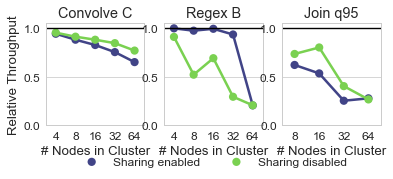

In [247]:
# Distributed sharing vs not comparison plot

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats.mstats import gmean
from scipy.stats import hmean

from numpy import mean

name_order = ['Sharing disabled', 'Sharing enabled']

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)

sns.set_palette(matplotlib_palette(n_colors=2, name='viridis', light=0.2, dark=0.8)) # This is a colorblind-safe palette (for 3 colors)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, figsize=(6, 1.875))


###
### Flickr
###

bandit_file = "/Users/tomerk11/Development/keystone-example/experiment-results/flickr-scaling-all/flickr-scaling-all.csv"

## Plot the current policy
bandit_rewards = pd.read_csv(bandit_file)

import numpy as np
df = bandit_rewards.copy()
df = df[df['partition_id'] >= 0]
df = df[df['numParts'] > 8]
df['time_in_sec'] = (df['system_nano_end_time'] - df['system_nano_start_time']) / 1e9
df = df[['numParts', 'policy', 'disableMulticore', 'patches', 'time_in_sec']]
df = df.groupby(['numParts', 'policy', 'disableMulticore', 'patches'], as_index=False).agg(np.sum)
df["policy2"] = df["policy"] + ',' + df["disableMulticore"].map(str)

#df = df[df['policy'] == 'constant:0']
df['numNodes'] = df['numParts'] / 4
#df =  df[['patches', 'policy2', 'numNodes', 'time_in_sec']]#.pivot(index='query', columns='policy2', values='totalExecutorJoinTime')
#df['oracle_min'] = df[['patches',  'numNodes', 'time_in_sec']].groupby(['patches',  'numNodes']).transform('min')

#df['val'] = (df['time_in_sec']) / df['oracle_min']


df =  df[['patches', 'policy2', 'numNodes', 'time_in_sec']]#.pivot(index='query', columns='policy2', values='totalExecutorJoinTime')
df['patches'] = df['patches'].astype(str)


#df_grouped = df[df['numNodes'] == 4][['regex', 'globalTime']].groupby(['regex']).agg('max')
df_grouped = df[df['numNodes'] == 4][['patches', 'time_in_sec']].groupby(['patches'], as_index=False).agg('min')
df_grouped['oracle_min'] = df_grouped['time_in_sec']
df_grouped['patches'] = df_grouped['patches'].astype(str)
df_joined = pd.merge(df, df_grouped[['patches', 'oracle_min']], on=['patches'])
df_joined['val'] = df_joined['oracle_min'] / (df_joined['time_in_sec'])


#df2 = df.copy()
#df2['totalExecutorJoinTime'] = df2['totalExecutorJoinTime']/1e3


#df2["policy2"] = df2["policy"] + ',' + df2["disableMulticore"].map(str) + ',' + df2["query"].map(str)
#df = df[df['py2'] != 'hash,True,False']
#df = df[df['py2'] != 'sort,True,False']

#df = df[df['regex'] != 3]
df_joined = df_joined[df_joined['policy2'].isin(['gaussian-thompson-sampling:1.0,False', 'gaussian-thompson-sampling:1.0,True'])]



#sns.plt.figure(figsize=(8, 3))
#sns.pointplot(data = df, x='numNodes', y='val', hue='py2')
#ax = sns.tsplot(data = df, unit='query', time='numNodes', condition='py2', value='val', err_style='ci_band', ci=[67, 100])
names = {'gaussian-thompson-sampling:1.0,False': 'Sharing enabled', 'gaussian-thompson-sampling:1.0,True': 'Sharing disabled'} 
df_joined = df_joined.replace({'policy2': names})
df_joined['numNodes'] = df_joined['numNodes'].astype(int)
df = df_joined

#sns.pointplot(data = df, x='numNodes', hue='policy2', y='val', capsize=0.3, ci=100, ax=ax1, n_boot=200000)
#sns.violinplot(data = df, x='numNodes', hue='policy2', y='val', ax=ax1, hue_order=name_order, split=True, cut=0, scale='area')
df = df[df['patches'] == '8,50']
sns.pointplot(data = df, x='numNodes', hue='policy2', y='val', ax=ax1, hue_order=name_order)#, estimator=hmean, capsize=.2)

#sns.boxplot(data = df, x='numNodes', hue='policy2', y='val', ax=ax1, hue_order=name_order, whis=999)#, estimator=hmean, capsize=.2)


#display(df)
#display(df_grouped)
#display(df_joined)

###
### Common Crawl REGEx
###
bandit_file = "/Users/tomerk11/Development/keystone-example/experiment-results/commoncrawl-scaling/commoncrawl-scaling-all.csv"

## Plot the current policy
bandit_rewards = pd.read_csv(bandit_file)
df = bandit_rewards
df = df[df['globalTime'] > 0]
df = df[df['regex'] == 3]

#df = df[df['policy'] == 'constant:0']

df['globalTime'] = df['globalTime']/1e3
df["policy2"] = df["policy"] + ',' + df["disableMulticore"].map(str)
#df2 = df2[df2['policy'] == 'gaussian-thompson-sampling:1.0']

#df = df[df['policy'] == 'constant:0']
df['numNodes'] = df['numParts'] / 16
df =  df[['regex', 'policy2', 'numNodes', 'globalTime']]#.pivot(index='query', columns='policy2', values='totalExecutorJoinTime')
df['oracle_min'] = df[['regex',  'numNodes', 'globalTime']].groupby(['regex',  'numNodes']).transform('min')

df['val'] =  df['oracle_min'] / (df['globalTime'])

'''
df =  df[['regex', 'policy2', 'numNodes', 'globalTime']]#.pivot(index='query', columns='policy2', values='totalExecutorJoinTime')
#df_grouped = df[df['numNodes'] == 4][['regex', 'globalTime']].groupby(['regex']).agg('max')
df_grouped = df[df['numNodes'] == 4][['regex', 'globalTime']].groupby(['regex'], as_index=False).agg('min')
df_grouped['oracle_min'] = df_grouped['globalTime']
df = df.join(df_grouped[['regex', 'oracle_min']], on=['regex'], how='inner', rsuffix='_r')
#df['oracle_min'] = df['oracle_min'] * 4 / df['numNodes']

df['val'] = (df['globalTime']) / df['oracle_min']'''

#df2 = df.copy()
#df2['totalExecutorJoinTime'] = df2['totalExecutorJoinTime']/1e3


#df2["policy2"] = df2["policy"] + ',' + df2["disableMulticore"].map(str) + ',' + df2["query"].map(str)
#df = df[df['py2'] != 'hash,True,False']
#df = df[df['py2'] != 'sort,True,False']

#df = df[df['regex'] != 3]
df = df[df['policy2'].str.startswith('gaussian')]


#sns.plt.figure(figsize=(4, 3))
#sns.pointplot(data = df, x='numNodes', y='val', hue='py2')
#ax = sns.tsplot(data = df, unit='query', time='numNodes', condition='py2', value='val', err_style='ci_band', ci=[67, 100])
names = {'gaussian-thompson-sampling:1.0,False': 'Sharing enabled', 'gaussian-thompson-sampling:1.0,True': 'Sharing disabled'}
df = df.replace({'policy2': names})

df['numNodes'] = df['numNodes'].astype(int)

#sns.pointplot(data = df, x='numNodes', hue='policy2', y='val', capsize=0.3, ci=100, ax=ax2, n_boot=2000)
#sns.violinplot(data = df, x='numNodes', hue='policy2', y='val', ax=ax2, hue_order=name_order, split=True, cut=0, scale='area')
sns.pointplot(data = df, x='numNodes', hue='policy2', y='val', ax=ax2)#, estimator=hmean, capsize=.2)



#sns.plt.ylim(0,)
#ax.set_xscale('log', basex=2)

###
### TPC-DS
###

bandit_file = "/Users/tomerk11/Development/keystone-example/experiment-results/tpcds-scaling/tpcds-scaling-all.csv"

## Plot the current policy
bandit_rewards = pd.read_csv(bandit_file)
df = bandit_rewards
df = df.sort_values('numNodes')
df = df[df['numNodes'] > 4]
df = df[df['index'] > 0]

#df = df[df['policy'] == 'constant:0']
df["py2"] = df["spark.sql.join.bandit.shuffleSortHash"] + ',' + df["spark.sql.join.banditJoin"].map(str) + ',' + df["disableMulticore"].map(str)
df =  df[['query', 'py2', 'numNodes', 'totalExecutorJoinTime']]#.pivot(index='query', columns='policy2', values='totalExecutorJoinTime')
df = df[df['py2'] != 'both,False,False']
df['oracle_max'] = df[['query',  'numNodes', 'totalExecutorJoinTime']].groupby(['query',  'numNodes']).transform('max')
df['oracle_min'] = df[['query',  'numNodes', 'totalExecutorJoinTime']].groupby(['query',  'numNodes']).transform('min')

df['val'] =  df['oracle_min'] / (df['totalExecutorJoinTime'])


#df2 = df.copy()
#df2['totalExecutorJoinTime'] = df2['totalExecutorJoinTime']/1e3


#df2["policy2"] = df2["policy"] + ',' + df2["disableMulticore"].map(str) + ',' + df2["query"].map(str)
df = df[df['py2'] != 'hash,True,False']
df = df[df['py2'] != 'sort,True,False']
names = {'both,True,False': 'Sharing enabled', 'both,True,True': 'Sharing disabled'}
df = df.replace({'py2': names})


#df = df[df['query'] != 'q72']

#sns.plt.figure(figsize=(8, 3))
#sns.pointplot(data = df, x='numNodes', y='val', hue='py2')
#ax = sns.tsplot(data = df, unit='query', time='numNodes', condition='py2', value='val', err_style='ci_band', ci=[67, 100])

#sns.boxplot(data = df, x='numNodes', hue='py2', y='val', ax=ax3, hue_order=name_order, whis=3.5)#, estimator=hmean, capsize=.2)
df = df[df['query'] == 'q95']
sns.pointplot(data = df, x='numNodes', hue='py2', y='val', ax=ax3, hue_order=name_order)#, estimator=hmean, capsize=.2)


# Remove undesired legends
ax1.legend_.remove()
ax3.legend_.remove()
leg = ax2.legend(loc=9, bbox_to_anchor=(0.5, -0.2), ncol=2)

#ax1.set_title('Flickr')
#ax2.set_title('Common Crawl')
#ax3.set_title('TPC-DS')

ax1.set_title('Convolve C')
ax2.set_title('Regex B')
ax3.set_title('Join q95')

#from matplotlib.ticker import FormatStrFormatter
#ax1.yaxis.set_major_formatter(FormatStrFormatter('%0.1fx'))
#ax2.yaxis.set_major_formatter(FormatStrFormatter('%0.1fx'))
#ax3.yaxis.set_major_formatter(FormatStrFormatter('%0.1fx'))

ax1.hlines([1.0], -1000, 1000)
ax2.hlines([1.0], -1000, 1000)
ax3.hlines([1.0], -1000, 1000)

ax1.set_ylim(0,1.05)
ax2.set_ylim(0,1.05)
ax3.set_ylim(0,1.05)

ax1.set_ylabel('Relative Throughput')
ax2.set_ylabel('')
ax3.set_ylabel('')

ax1.set_xlabel('# Nodes in Cluster')
ax2.set_xlabel('# Nodes in Cluster')
ax3.set_xlabel('# Nodes in Cluster')

plt.savefig('scaling-some.pdf', bbox_extra_artists=(leg,), bbox_inches='tight')
plt.show()


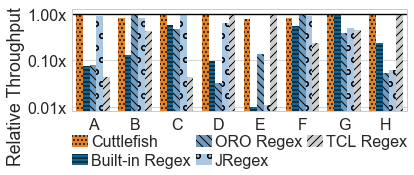

,regex,policy2,globalTime,oracle,val
212,A,TCL Regex,1128.079,48.847,0.043301
213,B,TCL Regex,132.845,58.455,0.440024
214,C,TCL Regex,170.434,7.424,0.043559
215,D,TCL Regex,149.605,149.605,1.000000
217,E,TCL Regex,13.887,13.887,1.000000
218,F,TCL Regex,15.989,3.740,0.233911
219,G,TCL Regex,173.090,78.695,0.454648
220,H,TCL Regex,13.845,13.845,1.000000
221,A,JRegex,53.421,48.847,0.914378
222,B,JRegex,70.972,58.455,0.823635


\begin{tabular}{lrrrrrrrr}
\toprule
Regex &     A &    B &    C &     D &     E &   F &    G &    H \\
Regex Library  &       &      &      &       &       &     &      &      \\
\midrule
Built-in Regex &   627 &  442 &   12 &  1564 &  1359 &   6 &   83 &   59 \\
Cuttlefish     &    48 &   71 &    7 &   153 &    18 &   4 &   78 &   14 \\
JRegex         &    53 &   70 &    7 &   232 &  1248 &   4 &  158 &  216 \\
ORO Regex      &   606 &   58 &   15 &  4523 &   102 &   3 &  205 &  255 \\
TCL Regex      &  1128 &  132 &  170 &   149 &    13 &  15 &  173 &   13 \\
\bottomrule
\end{tabular}



In [136]:
# Common Crawl Regex
bandit_file = "/Users/tomerk11/Development/keystone-example/experiment-results/commoncrawl-scaling/commoncrawl-scaling-all.csv"

## Plot the current policy
bandit_rewards = pd.read_csv(bandit_file)
df = bandit_rewards
df = df[df['globalTime'] > 0]
df = df[df['regex'] != 4]
regex_names = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 5: 'E', 6: 'F', 7: 'G', 8: 'H'}
df = df.replace({'regex': regex_names})

#df = df[df['policy'] == 'constant:0']

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=2.0)

# Colors sourced from: http://jfly.iam.u-tokyo.ac.jp/color/
# and from: http://www.cookbook-r.com/Graphs/Colors_%28ggplot2%29/
# Black, orange, sky blue, bluish green, yellow, blue, vermilion
#colors = ['#000000', '#e69f00', '#56b4e9', '#009e73', '#f0e442', '#0072b2', '#d55e00'][::-1]

colors = ['#FF800E', '#006BA4', '#5F9ED1', '#A2C8EC', '#CFCFCF']#colors = ['#f0e442', '#009e73', '#56b4e9', '#e69f00', '#999999', '#d55e00', '#000000', '#0072b2']

sns.set_palette(colors)#matplotlib_palette(n_colors=5, name='plasma', light=1.2, dark=0.0)) # This is a colorblind-safe palette (for 3 colors)


#plt.figure(figsize=(8, 3))



df['globalTime'] = df['globalTime']/1e3
df = df[df['numParts'] == 8*16]
df["policy2"] = df["policy"] + ',' + df["disableMulticore"].map(str)
#g = sns.FacetGrid(df, col="query", col_wrap=8, sharey=True, aspect=0.5)
#g.map(sns.barplot, 'policy2', 'totalExecutorJoinTime').set_titles("{col_name}")
#sns.barplot(data=df, x='policy2', y='totalExecutorJoinTime')
#df

df =  df[['regex', 'policy2', 'globalTime']]#.pivot(index='query', columns='policy2', values='totalExecutorJoinTime')
df['oracle'] = df[['regex', 'globalTime']].groupby('regex').transform('min')
df['val'] = df['oracle'] / df['globalTime'] 
df = df[df['policy2'] != 'gaussian-thompson-sampling:1.0,True']

names = {'constant:0,False': 'TCL Regex', 'constant:1,False': 'JRegex', 'constant:2,False': 'ORO Regex', 'constant:3,False': 'Built-in Regex', 'gaussian-thompson-sampling:1.0,False': 'Cuttlefish'}
name_order = ['Cuttlefish', 'Built-in Regex', 'ORO Regex', 'JRegex', 'TCL Regex']
df = df.replace({'policy2': names})

#plt.figure(figsize=(16, 3))
#sns.plt.ylim(0,14)
#ax = sns.barplot(data=df, x='regex', hue='policy2', y='val')

#plt.figure(figsize=(20, 1.0))
f, (ax) = plt.subplots(1, 1, sharex=True, figsize=(6, 1.875))

sns.barplot(data=df, x='regex', hue='policy2', hue_order=name_order, y='val', ax=ax)

# Set hatches
import itertools
hatches = itertools.cycle(['...', '---', '\\\\\\', 'o', '///'])
num_queries = len(df['regex'].unique())
for i, bar in enumerate(ax.patches):
    if i % num_queries == 0:
        hatch = next(hatches)
    bar.set_hatch(hatch)

ax.hlines([1.0], -1000, 1000)
ax.set_yscale('log', basey=10)
ax.get_xaxis().label.set_visible(False)
ax.set_yticks([0.01,0.1,1.0])
ax.yaxis.set_label_coords(-0.14,0.25)

ax.set_ylabel('Relative Throughput')
from matplotlib.ticker import FormatStrFormatter
ax.yaxis.set_major_formatter(FormatStrFormatter('%0.2fx'))

leg = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.15), ncol=3, columnspacing=0.3, labelspacing=0.2, borderpad=False, handlelength=1.0, handletextpad=0.2)

#df.plot.bar()
#plt.show()
plt.savefig('regex_8node.pdf', bbox_extra_artists=(leg,), bbox_inches='tight')
plt.show()

display(df)
df['Regex Library'] = df['policy2']
df['Regex'] = df['regex']
df['Total Regex Match Time (s)'] = df['globalTime'].astype(int)
print df.pivot(index='Regex Library', columns='Regex', values='Total Regex Match Time (s)').to_latex()



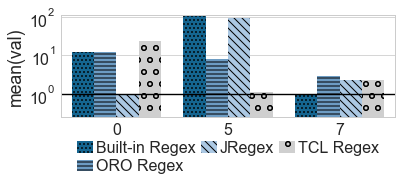

,regex,policy,globalTime,oracle,val
255985,0,TCL Regex,1216.136,49.768,24.436104
1535915,5,TCL Regex,13.847,12.520,1.105990
2047887,7,TCL Regex,172.093,72.341,2.378914
2559859,0,JRegex,49.768,49.768,1.000000
3839789,5,JRegex,1199.063,12.520,95.771805
4351761,7,JRegex,165.001,72.341,2.280878
4863733,0,ORO Regex,612.235,49.768,12.301780
6143663,5,ORO Regex,101.603,12.520,8.115256
6655635,7,ORO Regex,214.242,72.341,2.961557
7167607,0,Built-in Regex,604.401,49.768,12.144370


\begin{tabular}{lrrr}
\toprule
Regex &     0 &     5 &    7 \\
Regex Library                                 &       &       &      \\
\midrule
Built-in Regex                                &   604 &  1371 &   74 \\
JRegex                                        &    49 &  1199 &  165 \\
ORO Regex                                     &   612 &   101 &  214 \\
TCL Regex                                     &  1216 &    13 &  172 \\
oracle:min:oracle\_data.csv                    &    52 &    12 &   72 \\
slinear-thompson-sampling:doc\_length:true:1.0 &    52 &    18 &   77 \\
ucb1-normal:0.5                               &    50 &    14 &   73 \\
\bottomrule
\end{tabular}



In [137]:
### This cell generates the regex motivation plot

bandit_file = "/Users/tomerk11/Development/keystone-example/experiment-results/commoncrawl/regex-all.csv"

## Plot the current policy
bandit_rewards = pd.read_csv(bandit_file)
df = bandit_rewards
df = df[df['globalTime'] > 0]
df = df[df['regex'] != 4]

#df = df[df['policy'] == 'constant:0']

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=2.0)

# Colors sourced from: http://jfly.iam.u-tokyo.ac.jp/color/
# and from: http://www.cookbook-r.com/Graphs/Colors_%28ggplot2%29/
# Black, orange, sky blue, bluish green, yellow, blue, vermilion
#colors = ['#000000', '#e69f00', '#56b4e9', '#009e73', '#f0e442', '#0072b2', '#d55e00'][::-1]

colors = ['#006BA4', '#5F9ED1', '#A2C8EC', '#CFCFCF']#colors = ['#f0e442', '#009e73', '#56b4e9', '#e69f00', '#999999', '#d55e00', '#000000', '#0072b2']

sns.set_palette(colors)#matplotlib_palette(n_colors=5, name='plasma', light=1.2, dark=0.0)) # This is a colorblind-safe palette (for 3 colors)


#plt.figure(figsize=(8, 3))



df['globalTime'] = df['globalTime']/1e3
#g = sns.FacetGrid(df, col="query", col_wrap=8, sharey=True, aspect=0.5)
#g.map(sns.barplot, 'policy2', 'totalExecutorJoinTime').set_titles("{col_name}")
#sns.barplot(data=df, x='policy2', y='totalExecutorJoinTime')
#df

df = df[df['regex'].isin([0, 5, 7])]
df = df[df['policy'] != 'gaussian-thompson-sampling:1.0']
df =  df[['regex', 'policy', 'globalTime']]#.pivot(index='query', columns='policy2', values='totalExecutorJoinTime')
df['oracle'] = df[['regex', 'globalTime']].groupby('regex').transform('min')
df['val'] = df['globalTime'] / df['oracle']

names = {'constant:0': 'TCL Regex', 'constant:1': 'JRegex', 'constant:2': 'ORO Regex', 'constant:3': 'Built-in Regex'}
name_order = ['Built-in Regex', 'ORO Regex', 'JRegex', 'TCL Regex']
df = df.replace({'policy': names})

#plt.figure(figsize=(16, 3))
#sns.plt.ylim(0,14)
#ax = sns.barplot(data=df, x='regex', hue='policy2', y='val')

#plt.figure(figsize=(20, 1.0))
f, (ax) = plt.subplots(1, 1, sharex=True, figsize=(6, 1.875))

sns.barplot(data=df, x='regex', hue='policy', hue_order=name_order, y='val', ax=ax)

# Set hatches
import itertools
hatches = itertools.cycle(['...', '---', '\\\\\\', 'o', '///'])
num_queries = len(df['regex'].unique())
for i, bar in enumerate(ax.patches):
    if i % num_queries == 0:
        hatch = next(hatches)
    bar.set_hatch(hatch)

ax.hlines([1.0], -1000, 1000)
ax.set_yscale('log', basey=10)
ax.set_ylim(0.25,110)
ax.get_xaxis().label.set_visible(False)


leg = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.15), ncol=3, columnspacing=0.3, labelspacing=0.2, borderpad=False, handlelength=1.0, handletextpad=0.2)

#df.plot.bar()
#plt.show()
plt.savefig('regex_8node_motivation.pdf', bbox_extra_artists=(leg,), bbox_inches='tight')
plt.show()

display(df)
df['Regex Library'] = df['policy']
df['Regex'] = df['regex']
df['Total Regex Match Time (s)'] = df['globalTime'].astype(int)
print df.pivot(index='Regex Library', columns='Regex', values='Total Regex Match Time (s)').to_latex()


,index,query,arm,reward,spark.sql.shuffle.partitions,spark.sql.join.banditJoin,spark.sql.join.bandit.shuffleSortHash,spark.sql.join.banditJoin.contextual,system_nano_start_time,system_nano_end_time,totalExecutorJoinTime,joinTime,policy,query_gen_rules,driftRate,driftCoefficient,clusterCoefficient,communicationRate,disableMulticore,numNodes
1,1,q4,0,-9.859054e+10,512,True,both,False,13900058328713,13998648877363,2236894,177253,constant:0,q5:1-q4:1-q5:1-q11:1-q17:1-q24a:1-q24b:1,999999s,1.000000e+10,1.000000e+10,500ms,False,16
2,2,q5,0,-1.449044e+10,512,True,both,False,13998676784619,14013167231646,186993,3692,constant:0,q5:1-q4:1-q5:1-q11:1-q17:1-q24a:1-q24b:1,999999s,1.000000e+10,1.000000e+10,500ms,False,16
3,3,q11,0,-4.457552e+10,512,True,both,False,14013185517177,14057761043121,1449871,76149,constant:0,q5:1-q4:1-q5:1-q11:1-q17:1-q24a:1-q24b:1,999999s,1.000000e+10,1.000000e+10,500ms,False,16
4,4,q17,0,-3.205176e+10,512,True,both,False,14057778378612,14089830140687,912924,17773,constant:0,q5:1-q4:1-q5:1-q11:1-q17:1-q24a:1-q24b:1,999999s,1.000000e+10,1.000000e+10,500ms,False,16
5,5,q24a,0,-7.711033e+10,512,True,both,False,14089845495076,14166955829426,1118841,44076,constant:0,q5:1-q4:1-q5:1-q11:1-q17:1-q24a:1-q24b:1,999999s,1.000000e+10,1.000000e+10,500ms,False,16
6,6,q24b,0,-7.108954e+10,512,True,both,False,14166979864167,14238069412292,1112028,39434,constant:0,q5:1-q4:1-q5:1-q11:1-q17:1-q24a:1-q24b:1,999999s,1.000000e+10,1.000000e+10,500ms,False,16
8,1,q4,0,-1.024126e+11,512,True,both,False,14306657124190,14409069716009,2586362,205682,constant:0,q5:1-q4:1-q5:1-q11:1-q17:1-q24a:1-q24b:1,999999s,1.000000e+10,1.000000e+10,5s,True,16
9,2,q5,0,-1.386427e+10,512,True,both,False,14409097559180,14422961834729,220486,4138,constant:0,q5:1-q4:1-q5:1-q11:1-q17:1-q24a:1-q24b:1,999999s,1.000000e+10,1.000000e+10,5s,True,16
10,3,q11,0,-4.724548e+10,512,True,both,False,14422979703243,14470225187122,1641356,83988,constant:0,q5:1-q4:1-q5:1-q11:1-q17:1-q24a:1-q24b:1,999999s,1.000000e+10,1.000000e+10,5s,True,16
11,4,q17,0,-3.355904e+10,512,True,both,False,14470247391509,14503806434368,988236,18718,constant:0,q5:1-q4:1-q5:1-q11:1-q17:1-q24a:1-q24b:1,999999s,1.000000e+10,1.000000e+10,5s,True,16


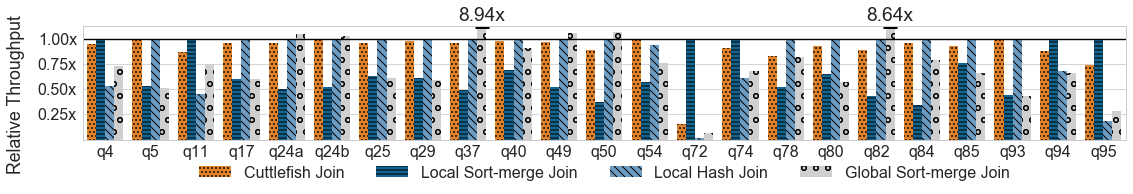

\begin{tabular}{lrrrrrrrrrrrrrrrrrrrrrrr}
\toprule
Query &  q11 &  q17 &  q24a &  q24b &  q25 &  q29 &  q37 &   q4 &  q40 &  q49 &  q5 &  q50 &  q54 &  q72 &  q74 &  q78 &  q80 &  q82 &  q84 &  q85 &  q93 &  q94 &  q95 \\
Join Type              &      &      &       &       &      &      &      &      &      &      &     &      &      &      &      &      &      &      &      &      &      &      &      \\
\midrule
Cuttlefish Join        &   40 &   27 &    33 &    33 &   29 &   27 &    4 &   63 &    9 &    7 &   4 &   15 &    9 &   60 &   37 &   52 &   43 &    8 &    0 &    8 &   17 &   50 &   48 \\
Global Sort-merge Join &   47 &   44 &    30 &    32 &   46 &   45 &    0 &   81 &   10 &    6 &   9 &   12 &   12 &  141 &   50 &   52 &   71 &    0 &    1 &   12 &   39 &   67 &  125 \\
Local Hash Join        &   78 &   26 &    32 &    33 &   28 &   27 &    4 &  112 &    9 &    7 &   4 &   13 &   10 &  691 &   56 &   43 &   40 &    7 &    0 &    8 &   17 &   64 &  193 \\
Local Sort-merge 

In [12]:
bandit_file = "/Users/tomerk11/Development/keystone-example/experiment-results/tpcds-scaling/tpcds-scaling-all.csv"

## Plot the current policy
bandit_rewards = pd.read_csv(bandit_file)
df = bandit_rewards
df = df[df['numNodes'] > 4]
df = df[df['index'] > 0]

#df = df[df['policy'] == 'constant:0']

'''
df2 = df.copy()
df2['totalExecutorJoinTime'] = df2['totalExecutorJoinTime']/1e3
df2["policy2"] = df2["policy"] + ',' + df2["disableMulticore"].map(str)
VegaLite({
  "mark": "bar",
  "encoding": {
    "y": {"type": "quantitative","field": "totalExecutorJoinTime"},
    "x": {"type": "nominal","field": "policy2"},

    "color": {"type": "nominal","field": "policy2"},

    "row": {"type": "quantitative", "field": "numNodes"},
     "column": {"field": "query", "type": 'nominal'}
  }
}, df2)
'''

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=2.0)

# Colors sourced from: http://jfly.iam.u-tokyo.ac.jp/color/
# and from: http://www.cookbook-r.com/Graphs/Colors_%28ggplot2%29/
# Black, orange, sky blue, bluish green, yellow, blue, vermilion
#colors = ['#000000', '#e69f00', '#56b4e9', '#009e73', '#f0e442', '#0072b2', '#d55e00'][::-1]

#Colors from tableau colorblind 10
colors = ['#FF800E', '#006BA4', '#5F9ED1', '#CFCFCF']#colors = ['#f0e442', '#009e73', '#56b4e9', '#e69f00', '#999999', '#d55e00', '#000000', '#0072b2']

sns.set_palette(colors)#matplotlib_palette(n_colors=5, name='plasma', light=1.2, dark=0.0)) # This is a colorblind-safe palette (for 3 colors)
#sns.set_palette(matplotlib_palette(n_colors=4, name='viridis', light=1.2, dark=0.0)) # This is a colorblind-safe palette (for 3 colors)

#plt.figure(figsize=(8, 3))


display(df)
df['totalExecutorJoinTime'] = df['totalExecutorJoinTime']/32e3
df = df[df['numNodes'] == 8]
df["policy2"] = df["spark.sql.join.bandit.shuffleSortHash"] + ',' + df["spark.sql.join.banditJoin"].map(str) + ',' + df["disableMulticore"].map(str)
#g = sns.FacetGrid(df, col="query", col_wrap=8, sharey=True, aspect=0.5)
#g.map(sns.barplot, 'policy2', 'totalExecutorJoinTime').set_titles("{col_name}")
#sns.barplot(data=df, x='policy2', y='totalExecutorJoinTime')
#df

df_grouped = df[df['policy2'] != 'both,False,False'][['query', 'totalExecutorJoinTime']].groupby(['query'], as_index=False).agg('min')
df_grouped['oracle'] = df_grouped['totalExecutorJoinTime']
df = pd.merge(df, df_grouped[['query', 'oracle']], on=['query'])

df =  df[df['policy2'] != 'both,True,True']
#df =  df[df['policy2'] != 'both,False,False'][df['policy2'] != 'both,True,True'][['query', 'policy2', 'totalExecutorJoinTime']]#.pivot(index='query', columns='policy2', values='totalExecutorJoinTime')
#df['oracle'] = df[['query', 'totalExecutorJoinTime']].groupby('query').transform('min')
df['val'] = df['oracle'] / df['totalExecutorJoinTime']

names = {'both,True,False': 'Cuttlefish Join', 'hash,True,False': 'Local Hash Join', 'sort,True,False': 'Local Sort-merge Join', 'both,False,False': 'Global Sort-merge Join'}
name_order = ['Sharing enabled', 'Sharing disabled']
df = df.replace({'policy2': names})


#plt.figure(figsize=(20, 0.5))
f, (ax) = plt.subplots(1, 1, sharex=True, figsize=(16, 2.5))

sns.barplot(data=df, x='query', hue='policy2', y='val', ax=ax)

# Set hatches
ax.set_ylim(0,1.125)

# Set hatches
import itertools
hatches = itertools.cycle(['...', '---', '\\\\\\', 'o', '///'])
num_queries = len(df['query'].unique())
for i, bar in enumerate(ax.patches):
    if i % num_queries == 0:
        hatch = next(hatches)
    bar.set_hatch(hatch)

for p in ax.patches:
    ymin, ymax = ax.get_ylim()
    height = p.get_height()
    if height > ymax:
        ax.hlines([ymax], p.get_x()-p.get_width()/4., p.get_x()+p.get_width()*1.25, linewidth=5)
        ax.text(p.get_x()+p.get_width()/2.,
                min(height, ymax) + 0.05,
                '{:1.2f}x'.format(height),
                ha="center") 


ax.set_xlabel('')
ax.set_yticks([0.25, 0.5, 0.75, 1.0])
from matplotlib.ticker import FormatStrFormatter
ax.yaxis.set_major_formatter(FormatStrFormatter('%0.2fx'))

ax.set_ylabel('Relative Throughput')
ax.yaxis.set_label_coords(-0.055,0.4)


ax.hlines([1.0], -1000, 1000)

#ax.get_yaxis().set_visible(False)


leg = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=4)

plt.tight_layout()
#df.plot.bar()
#plt.show()
plt.savefig('tpcds_8node.pdf', bbox_extra_artists=(leg,), bbox_inches='tight')
plt.show()

df['Join Type'] = df['policy2']
df['Query'] = df['query']
df['Total Join Time (s)'] = df['totalExecutorJoinTime'].astype(int)
print df.pivot(index='Join Type', columns='Query', values='Total Join Time (s)').to_latex()


In [79]:
bandit_file = "/Users/tomerk11/Development/keystone-example/experiment-results/flickr-nonstationary/flickr-nonstationary-all.csv"

## Plot the current policy
bandit_rewards = pd.read_csv(bandit_file)
df = bandit_rewards.copy()
df = df[df['partition_id'] > -1]

import numpy as np
df['time_in_sec'] = (df['system_nano_end_time'] - df['system_nano_start_time']) / 1e9
df = df[['policy', 'tag', 'clusterCoefficient', 'nonstationarity', 'time_in_sec']]

#df = df[df['policy'] == "constant:0"]

#df = df[df['policy'] == 'constant:0']

df = df.groupby(['policy', 'tag', 'clusterCoefficient', 'nonstationarity']).describe()
df

,partition_id,pos_in_partition,canonical_tuple_id,img_x_dim,img_y_dim,filter_rows,filter_cols,system_nano_start_time,system_nano_end_time,arm,...,crops,patches,driftRate,driftCoefficient,clusterCoefficient,communicationRate,disableMulticore,numParts,globalTime,tag
0,0,0,32_0,250,167,3,75,165034635833832,165034670515328,0,...,"0,0,0.5,0.5","5,3:5,20:8,30:20,5:30,8:25,5:5,25:3,5",15s,0.25,0.25,500ms,False,32,0,shareSmart
1,0,1,64_0,185,250,3,75,165034670868891,165034704174540,0,...,"0,0,0.5,0.5","5,3:5,20:8,30:20,5:30,8:25,5:5,25:3,5",15s,0.25,0.25,500ms,False,32,0,shareSmart
2,0,2,96_0,250,166,3,75,165034704259099,165035107240544,2,...,"0,0,0.5,0.5","5,3:5,20:8,30:20,5:30,8:25,5:5,25:3,5",15s,0.25,0.25,500ms,False,32,0,shareSmart
3,0,3,128_0,187,250,3,75,165035107340452,165035160239365,1,...,"0,0,0.5,0.5","5,3:5,20:8,30:20,5:30,8:25,5:5,25:3,5",15s,0.25,0.25,500ms,False,32,0,shareSmart
4,0,4,160_0,187,250,3,75,165035160335914,165035444709053,2,...,"0,0,0.5,0.5","5,3:5,20:8,30:20,5:30,8:25,5:5,25:3,5",15s,0.25,0.25,500ms,False,32,0,shareSmart
5,0,5,192_0,156,250,3,75,165035444774554,165035487984888,1,...,"0,0,0.5,0.5","5,3:5,20:8,30:20,5:30,8:25,5:5,25:3,5",15s,0.25,0.25,500ms,False,32,0,shareSmart
6,0,6,224_0,187,250,3,75,165035488121339,165035521076561,0,...,"0,0,0.5,0.5","5,3:5,20:8,30:20,5:30,8:25,5:5,25:3,5",15s,0.25,0.25,500ms,False,32,0,shareSmart
7,0,7,256_0,166,250,3,75,165035521146047,165035548164219,0,...,"0,0,0.5,0.5","5,3:5,20:8,30:20,5:30,8:25,5:5,25:3,5",15s,0.25,0.25,500ms,False,32,0,shareSmart
8,0,8,288_0,187,250,3,75,165035548242321,165035577345092,0,...,"0,0,0.5,0.5","5,3:5,20:8,30:20,5:30,8:25,5:5,25:3,5",15s,0.25,0.25,500ms,False,32,0,shareSmart
9,0,9,320_0,187,250,3,75,165035577431052,165035606628198,0,...,"0,0,0.5,0.5","5,3:5,20:8,30:20,5:30,8:25,5:5,25:3,5",15s,0.25,0.25,500ms,False,32,0,shareSmart


In [5]:
bandit_file = "/Users/tomerk11/Development/keystone-example/experiment-results/flickr-nonstationary/flickr-nonstationary-all.csv"

## Plot the current policy
bandit_rewards = pd.read_csv(bandit_file)



/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:45: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=3,center=False).mean()


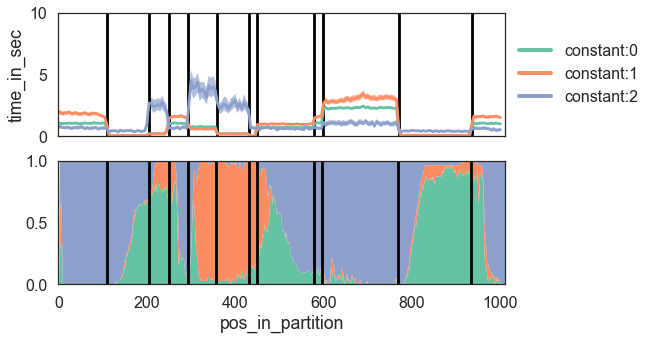

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style("white")
sns.set_context("poster", font_scale=1.0)

#plt.viridis()
#sns.set_palette(matplotlib_palette(n_colors=3, name='cubehelix', reverse=True, light=0.8, dark=0.2)) # This is a colorblind-safe palette (for 3 colors)
sns.set_palette(sns.color_palette("Set2", 3))

plt.figure(figsize=(8, 3))

nonstationarity = 'global_drift,0.01'
df2 = bandit_rewards.copy()
df2 = df2[df2['partition_id'] > -1]
df2 = df2[df2['policy'] == "gaussian-thompson-sampling:1.0"]
df2 = df2[df2['tag'] == 'shareSmart']
df2 = df2[df2['clusterCoefficient'] == 1]
df2 = df2[df2['nonstationarity'] == nonstationarity]


df3 = bandit_rewards.copy()
df3 = df3[df3['partition_id'] > -1]

#df3 = df3[df3['pos_in_partition'] < 600]

df3 = df3[df3['nonstationarity'] == nonstationarity]
df3 = df3[df3['policy'].str.startswith('constant')]
df3['time_in_sec'] = (df3['system_nano_end_time'] - df3['system_nano_start_time']) / 1e9
df3 = df3[['partition_id', 'pos_in_partition', 'time_in_sec', 'policy']]
window_size = 5
df3['partition_id'] = (df3['pos_in_partition'] % window_size) + df3['partition_id'] * window_size
df3['pos_in_partition'] = (df3['pos_in_partition'] / window_size).astype(int) * window_size

#df3 = df3.groupby(['pos_in_partition', 'policy'], as_index=False).agg(np.mean)
#df3 = df3.pivot(index='pos_in_partition', columns='policy', values='time_in_sec')
#df3 = df3[df3.columns.tolist()[::-1]]

df2 = df2[['pos_in_partition', 'arm']]#df2[['policy', 'tag', 'clusterCoefficient', 'pos_in_partition', 'arm', 'nonstationarity']]
df2['count'] = 1
df2 = df2.groupby(['pos_in_partition', 'arm'], as_index=False).agg(np.sum)
df2 = df2.pivot(index='pos_in_partition', columns='arm', values='count').fillna(0)
df2 = df2.div(df2.sum(axis=1), axis=0) # Normalize the rows
df2 = pd.rolling_mean(df2, 3)

def rolling_mean(data, axis=0):
    return pd.rolling_mean(data, 1, axis=1).mean(axis=axis)

import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(2, 1)

changes=[110,205,250,293,358,431,450,578,598,770,935]
#df2.plot()
vex = plt.subplot(gs[0, 0])
vex = sns.tsplot(ax = vex, time='pos_in_partition', value='time_in_sec', unit='partition_id', err_style='ci_band', ci=[0, 0, 0, 0, 0, 100, 100, 100, 100, 100], condition='policy', data=df3)#df3.plot(figsize=(8, 3), logy=True)
#vex = sns.tsplot(ax = vex, time='pos_in_partition', value='time_in_sec', unit='partition_id', err_style=None, condition='policy', data=df3)#df3.plot(figsize=(8, 3), logy=True)

#vex.set_yscale('log')
vex.get_xaxis().set_visible(False)
vex.set_ylim(0.01,10)


vex.vlines(changes, 0.0, 10.0)
leg = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# set the linewidth of each legend object
for legobj in leg.legendHandles:
    legobj.set_linewidth(4.0)

vax = plt.subplot(gs[1, 0])
#vax = df2.plot(ax = vax, kind='line', figsize=(8, 5), legend=False)

vax = df2.plot(ax = vax, kind='area', figsize=(8, 5), linewidth=0, legend=False)

vax.vlines(changes, 0.0, 1.0)
vax.set_ylim(0,1)

#leg = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# set the linewidth of each legend object
#for legobj in leg.legendHandles:
#    legobj.set_linewidth(4.0)
plt.savefig('global_drift.pdf', bbox_extra_artists=(leg,), bbox_inches='tight')
#df2[0]
#sinplot()
plt.show()

# 

about to load!
Loaded


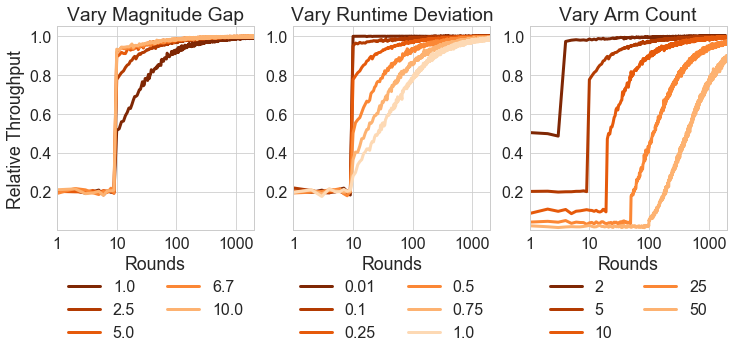

In [295]:
# Plot convergence over time, single thread simulation
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

print "about to load!"
bandit_file = "/Users/tomerk11/Development/keystone-example/experiment-results/single-thread-stress/single_thread_stress_pick_percent.csv"
## Plot the current policy
bandit_rewards = pd.read_csv(bandit_file)
print "Loaded"


sns.set_style("whitegrid")
sns.set_context("paper", font_scale=2.0, rc={"lines.linewidth": 3})
sns.set_palette(matplotlib_palette(n_colors=6, name='Oranges', light=1.0, dark=0.2)) # This is a colorblind-safe palette (for 3 colors)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, figsize=(12, 3.75))

ax1.set_xscale('log', basex=10)
ax2.set_xscale('log', basex=10)
ax3.set_xscale('log', basex=10)

sns.set_palette(matplotlib_palette(n_colors=5, name='viridis', light=0.0, dark=1.0)) # This is a colorblind-safe palette (for 3 colors)
df = bandit_rewards.copy()
df = df[df['StdDevMultiplier'] == 0.25]
df = df[df['NumArms'] == 5]
df = df.pivot(index='Step', columns='RewardMagnitude', values='PercentBestChosen')
df.plot(ax=ax1)

sns.set_palette(matplotlib_palette(n_colors=6, name='viridis', light=0.0, dark=1.0)) # This is a colorblind-safe palette (for 3 colors)
df = bandit_rewards.copy()
df = df[df['RewardMagnitude'] == 2.5]
df = df[df['NumArms'] == 5]
df = df.pivot(index='Step', columns='StdDevMultiplier', values='PercentBestChosen')
df.plot(ax=ax2)


sns.set_palette(matplotlib_palette(n_colors=5, name='viridis', light=0.0, dark=1.0)) # This is a colorblind-safe palette (for 3 colors)
df = bandit_rewards.copy()
df = df[df['RewardMagnitude'] == 2.5]
df = df[df['StdDevMultiplier'] == 0.25]
df = df.pivot(index='Step', columns='NumArms', values='PercentBestChosen')
df.plot(ax=ax3)

from matplotlib.ticker import FormatStrFormatter

ax1.set_xlabel('Rounds')
ax1.set_yticks([0.2,0.4,0.6,0.8,1.0])
ax1.yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax1.xaxis.set_major_formatter(FormatStrFormatter('%0.0f'))

ax2.set_xlabel('Rounds')
ax2.set_yticks([0.2,0.4,0.6,0.8,1.0])
ax2.yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax2.xaxis.set_major_formatter(FormatStrFormatter('%0.0f'))

ax3.set_xlabel('Rounds')
ax3.set_yticks([0.2,0.4,0.6,0.8,1.0])
ax3.yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax3.xaxis.set_major_formatter(FormatStrFormatter('%0.0f'))

ax1.set_ylim(0,1.05)
ax2.set_ylim(0,1.05)
ax3.set_ylim(0,1.05)

leg = ax1.legend(loc=9, bbox_to_anchor=(0.5, -0.17), ncol=2)
ax2.legend(loc=9, bbox_to_anchor=(0.5, -0.17), ncol=2)
ax3.legend(loc=9, bbox_to_anchor=(0.5, -0.17), ncol=2)

ax1.set_ylabel('Relative Throughput')

ax1.set_title('Vary Magnitude Gap')
ax2.set_title('Vary Runtime Deviation')
ax3.set_title('Vary Arm Count')

plt.savefig('pull_probability.pdf', bbox_extra_artists=(leg,), bbox_inches='tight')
plt.show()

about to load!
Loaded


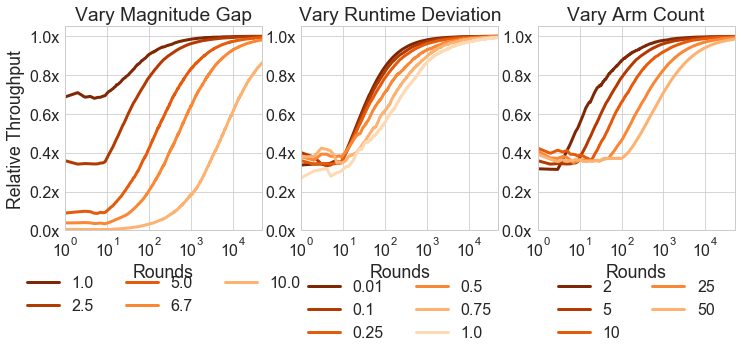

In [298]:
# Plot cumulative throughput over time, single thread simulation
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

print "about to load!"
bandit_file = "/Users/tomerk11/Development/keystone-example/experiment-results/single-thread-stress/singlethread_cumulative.csv"
## Plot the current policy
bandit_rewards = pd.read_csv(bandit_file)
df = bandit_rewards.copy()
print "Loaded"


sns.set_style("whitegrid")
sns.set_context("paper", font_scale=2.0, rc={"lines.linewidth": 3})

sns.set_palette(matplotlib_palette(n_colors=6, name='Oranges', light=1.0, dark=0.2)) # This is a colorblind-safe palette (for 3 colors)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, figsize=(12, 3.75))

ax1.set_xscale('log', basex=10)
ax2.set_xscale('log', basex=10)
ax3.set_xscale('log', basex=10)

ax1.set_ylim(0,1.05)
ax2.set_ylim(0,1.05)
ax3.set_ylim(0,1.05)

df = bandit_rewards.copy()
df = df[df['StdDevMultiplier'] == 0.25]
df = df[df['NumArms'] == 5]
df = df.pivot(index='Step', columns='RewardMagnitude', values='CumulativeThroughput')
df.plot(ax=ax1)

df = bandit_rewards.copy()
df = df[df['RewardMagnitude'] == 2.5]
df = df[df['NumArms'] == 5]
df = df.pivot(index='Step', columns='StdDevMultiplier', values='CumulativeThroughput')
df.plot(ax=ax2)

df = bandit_rewards.copy()
df = df[df['RewardMagnitude'] == 2.5]
df = df[df['StdDevMultiplier'] == 0.25]
df = df.pivot(index='Step', columns='NumArms', values='CumulativeThroughput')
df.plot(ax=ax3)

from matplotlib.ticker import FormatStrFormatter

ax1.set_xlabel('Rounds')
ax1.set_xticks([1, 10, 100, 1000, 10000])
ax1.yaxis.set_major_formatter(FormatStrFormatter('%0.1fx'))
#ax1.xaxis.set_major_formatter(FormatStrFormatter('%0.0f'))

ax2.set_xlabel('Rounds')
ax2.set_xticks([1, 10, 100, 1000, 10000])
ax2.yaxis.set_major_formatter(FormatStrFormatter('%0.1fx'))
#ax2.xaxis.set_major_formatter(FormatStrFormatter('%0.0f'))

ax3.set_xlabel('Rounds')
ax3.set_xticks([1, 10, 100, 1000, 10000])
ax3.yaxis.set_major_formatter(FormatStrFormatter('%0.1fx'))
#ax3.xaxis.set_major_formatter(FormatStrFormatter('%0.0f'))

ax1.set_ylim(0,1.05)
ax2.set_ylim(0,1.05)
ax3.set_ylim(0,1.05)

ax1.set_title('Vary Magnitude Gap')
ax2.set_title('Vary Runtime Deviation')
ax3.set_title('Vary Arm Count')

ax1.set_ylabel('Relative Throughput')

leg = ax1.legend(loc=9, bbox_to_anchor=(0.5, -0.15), ncol=3)
ax2.legend(loc=9, bbox_to_anchor=(0.5, -0.17), ncol=2)
ax3.legend(loc=9, bbox_to_anchor=(0.5, -0.17), ncol=2)

plt.savefig('cumulative_reward.pdf', bbox_extra_artists=(leg,), bbox_inches='tight')
plt.show()



about to load!
Loaded
about to load!
Loaded
about to load!
Loaded
about to load!
Loaded


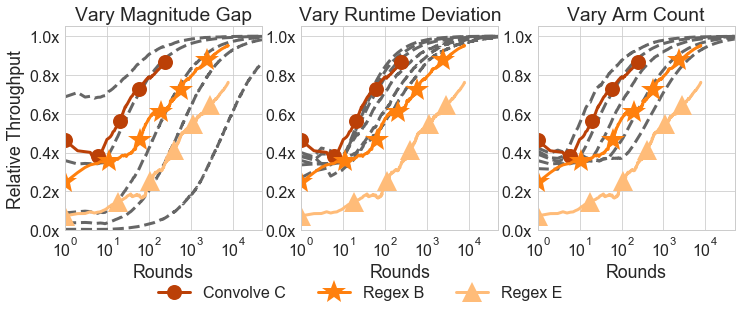

In [5]:
# Plot cumulative throughput over time, single thread simulation
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

print "about to load!"
bandit_file = "/Users/tomerk11/Development/keystone-example/experiment-results/single-thread-stress/singlethread_cumulative.csv"
## Plot the current policy
bandit_rewards = pd.read_csv(bandit_file)
print "Loaded"


sns.set_style("whitegrid")
sns.set_context("paper", font_scale=2.0, rc={"lines.linewidth": 3})

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, figsize=(12, 3.75))

ax1.set_xscale('log', basex=10)
ax2.set_xscale('log', basex=10)
ax3.set_xscale('log', basex=10)

ax1.set_ylim(0,1.05)
ax2.set_ylim(0,1.05)
ax3.set_ylim(0,1.05)

my_colors = ['#666666', '#666666', '#666666', '#666666', '#666666']
df = bandit_rewards.copy()
df = df[df['StdDevMultiplier'] == 0.25]
df = df[df['NumArms'] == 5]
df = df.pivot(index='Step', columns='RewardMagnitude', values='CumulativeThroughput')
df.plot(ax=ax1, color=my_colors, linestyle='--', legend=False)
ax1.legend([])

df = bandit_rewards.copy()
df = df[df['RewardMagnitude'] == 2.5]
df = df[df['NumArms'] == 5]
df = df.pivot(index='Step', columns='StdDevMultiplier', values='CumulativeThroughput')
df.plot(ax=ax2, color=my_colors, linestyle='--', legend=False)

df = bandit_rewards.copy()
df = df[df['RewardMagnitude'] == 2.5]
df = df[df['StdDevMultiplier'] == 0.25]
df = df.pivot(index='Step', columns='NumArms', values='CumulativeThroughput')
df.plot(ax=ax3, color=my_colors, linestyle='--')

# Try overlaying the true data
print "about to load!"
bandit_file = "/Users/tomerk11/Development/keystone-example/experiment-results/distributed-comparison/convolve-distributed.csv"
bandit_rewards = pd.read_csv(bandit_file)
print "Loaded"

colors = ['#FF800E', '#FFFFFF', '#FFBC79', '#CFCFCF', '#BB4007'] #['#f0e442', '#009e73', '#56b4e9', '#e69f00', '#999999', '#d55e00', '#000000', '#0072b2']

df = bandit_rewards.copy()
df = df[df['Policy'].str.startswith('gaussian')]
df = df[df['Tag'] == 'noDistribute']
df = df.pivot(index='PosInPartition', columns='Tag', values='CumulativeThroughput')
df.plot(ax=ax1, color='#BB4007', linestyle='-', marker='o',markevery=0.15, markersize=15, label='Convolve C')
df.plot(ax=ax2, color='#BB4007', linestyle='-', marker='o',markevery=0.15, markersize=15)
df.plot(ax=ax3, color='#BB4007', linestyle='-', marker='o',markevery=0.15, markersize=15)


print "about to load!"
bandit_file = "/Users/tomerk11/Development/keystone-example/experiment-results/distributed-comparison/regex-1-distributed.csv"
bandit_rewards = pd.read_csv(bandit_file)
print "Loaded"

df = bandit_rewards.copy()
df = df[df['Policy'].str.startswith('gaussian')]
df = df[df['DisableMulticore'] == 'true:false']
df = df.pivot(index='PosInPartition', columns='DisableMulticore', values='CumulativeThroughput')
df.plot(ax=ax1, color='#FF800E', linestyle='-', marker='*',markevery=0.18, markersize=25, label='Regex B')
df.plot(ax=ax2, color='#FF800E', linestyle='-', marker='*',markevery=0.18, markersize=25)
df.plot(ax=ax3, color='#FF800E', linestyle='-', marker='*',markevery=0.18, markersize=25)

print "about to load!"
bandit_file = "/Users/tomerk11/Development/keystone-example/experiment-results/distributed-comparison/regex-5-distributed.csv"
bandit_rewards = pd.read_csv(bandit_file)
print "Loaded"

df = bandit_rewards.copy()
df = df[df['Policy'].str.startswith('gaussian')]
df = df[df['DisableMulticore'] == 'true:false']
df = df.pivot(index='PosInPartition', columns='DisableMulticore', values='CumulativeThroughput')
df.plot(ax=ax1, color='#FFBC79', linestyle='-', marker='^',markevery=0.2, markersize=20, label='Regex E')
df.plot(ax=ax2, color='#FFBC79', linestyle='-', marker='^',markevery=0.2, markersize=20)
df.plot(ax=ax3, color='#FFBC79', linestyle='-', marker='^',markevery=0.2, markersize=20)

from matplotlib.ticker import FormatStrFormatter

ax1.set_xlabel('Rounds')
ax1.set_xticks([1, 10, 100, 1000, 10000])
ax1.yaxis.set_major_formatter(FormatStrFormatter('%0.1fx'))
#ax1.xaxis.set_major_formatter(FormatStrFormatter('%0.0f'))

ax2.set_xlabel('Rounds')
ax2.set_xticks([1, 10, 100, 1000, 10000])
ax2.yaxis.set_major_formatter(FormatStrFormatter('%0.1fx'))
#ax2.xaxis.set_major_formatter(FormatStrFormatter('%0.0f'))

ax3.set_xlabel('Rounds')
ax3.set_xticks([1, 10, 100, 1000, 10000])
ax3.yaxis.set_major_formatter(FormatStrFormatter('%0.1fx'))
#ax3.xaxis.set_major_formatter(FormatStrFormatter('%0.0f'))

ax1.set_ylim(0,1.05)
ax2.set_ylim(0,1.05)
ax3.set_ylim(0,1.05)

ax1.set_ylabel('Relative Throughput')

ax1.set_title('Vary Magnitude Gap')
ax2.set_title('Vary Runtime Deviation')
ax3.set_title('Vary Arm Count')

red_patch = mpatches.Patch(color='red', label='The red data')
handles, labels = ax1.get_legend_handles_labels()
leg = ax1.legend(handles[5:], ['Convolve C', 'Regex B', 'Regex E'], loc=9, bbox_to_anchor=(1.5, -0.2), ncol=3)
#leg = ax1.legend(handles=[red_patch])

#leg = ax1.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=3)
ax2.legend_.remove()
ax3.legend_.remove()

plt.savefig('cumulative_reward_overlay.pdf', bbox_extra_artists=(leg,), bbox_inches='tight')
plt.show()



about to load!
Loaded
about to load!
Loaded
about to load!
Loaded


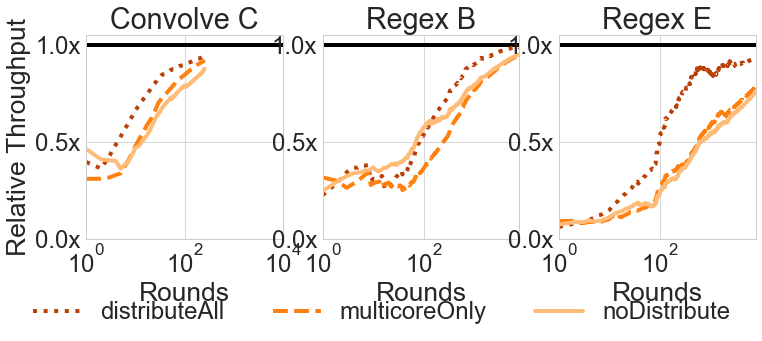

In [279]:
# Plot cumulative throughput over time, Distributed
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=3.0, rc={"lines.linewidth": 4})

colors = ['#BB4007', '#FF800E', '#FFBC79', '#A2C8EC']#['#f0e442', '#009e73', '#56b4e9', '#e69f00', '#999999', '#d55e00', '#000000', '#0072b2']
sns.set_palette(colors)#matplotlib_palette(n_colors=5, name='plasma', light=1.2, dark=0.0)) # This is a colorblind-safe palette (for 3 colors)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, figsize=(12, 3.75))

ax1.set_xscale('log', basex=10)
ax2.set_xscale('log', basex=10)
ax3.set_xscale('log', basex=10)

ax1.set_ylim(0,1.05)
ax2.set_ylim(0,1.05)
ax3.set_ylim(0,1.05)

print "about to load!"
bandit_file = "/Users/tomerk11/Development/keystone-example/experiment-results/distributed-comparison/convolve-distributed.csv"
bandit_rewards = pd.read_csv(bandit_file)
print "Loaded"

df = bandit_rewards.copy()
df = df[df['Policy'].str.startswith('gaussian')]
df = df.pivot(index='PosInPartition', columns='Tag', values='CumulativeThroughput')
df.plot(ax=ax1, style=[':','--','-'])

print "about to load!"
bandit_file = "/Users/tomerk11/Development/keystone-example/experiment-results/distributed-comparison/regex-1-distributed.csv"
bandit_rewards = pd.read_csv(bandit_file)
print "Loaded"

df = bandit_rewards.copy()
df = df[df['Policy'].str.startswith('gaussian')]
df = df.pivot(index='PosInPartition', columns='DisableMulticore', values='CumulativeThroughput')
df.plot(ax=ax2, style=[':','--','-'])

print "about to load!"
bandit_file = "/Users/tomerk11/Development/keystone-example/experiment-results/distributed-comparison/regex-5-distributed.csv"
bandit_rewards = pd.read_csv(bandit_file)
print "Loaded"

df = bandit_rewards.copy()
df = df[df['Policy'].str.startswith('gaussian')]
df = df.pivot(index='PosInPartition', columns='DisableMulticore', values='CumulativeThroughput')
df.plot(ax=ax3, style=[':','--','-'])

ax1.set_xlabel('Rounds')
ax1.set_xticks([1, 100, 1000])
ax1.yaxis.set_major_formatter(FormatStrFormatter('%0.1fx'))
#ax1.xaxis.set_major_formatter(FormatStrFormatter('%0.0f'))

ax2.set_xlabel('Rounds')
ax1.set_xticks([1, 100, 10000])
ax2.yaxis.set_major_formatter(FormatStrFormatter('%0.1fx'))
#ax2.xaxis.set_major_formatter(FormatStrFormatter('%0.0f'))

ax3.set_xlabel('Rounds')
ax1.set_xticks([1, 100, 10000])
ax3.yaxis.set_major_formatter(FormatStrFormatter('%0.1fx'))
#ax3.xaxis.set_major_formatter(FormatStrFormatter('%0.0f'))

ax1.set_ylim(0,1.05)
ax2.set_ylim(0,1.05)
ax3.set_ylim(0,1.05)

ax1.set_ylabel('Relative Throughput')

ax2.legend_.remove()
ax3.legend_.remove()
leg = ax1.legend(loc=9, bbox_to_anchor=(1.5, -0.2), ncol=3)

ax1.hlines([1.0], -10000, 10000)
ax2.hlines([1.0], -10000, 10000)
ax3.hlines([1.0], -10000, 10000)

ax1.set_title('Convolve C')
ax2.set_title('Regex B')
ax3.set_title('Regex E')

plt.savefig('distributed_throughput_analysis.pdf', bbox_extra_artists=(leg,), bbox_inches='tight')
plt.show()


